# **1-Dataset Analysis:**


## *i) Cleaning Dataset:*


### **Importings:**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from ast import literal_eval




In [3]:
data= pd.read_csv("../data-history/up-to-date-MAL/anime-july.csv")


print(data.shape)
data.head(1)

(24098, 31)


,id,title,media_type,mean,num_scoring_users,status,num_episodes,start_date,end_date,source,...,studios,synopsis,nsfw,created_at,updated_at,main_picture_medium,main_picture_large,alternative_titles_en,alternative_titles_ja,alternative_titles_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.13,1866190,finished_airing,64.0,2009-04-05,2010-07-04,manga,...,['Bones'],After a horrific alchemy experiment goes wrong...,white,2008-08-21 03:35:22,2022-04-18 05:06:13,https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...


In [4]:
data.dtypes

id                               int64
title                           object
media_type                      object
mean                           float64
num_scoring_users                int64
status                          object
num_episodes                   float64
start_date                      object
end_date                        object
source                          object
num_list_users                   int64
popularity                     float64
num_favorites                    int64
rank                           float64
average_episode_duration        object
rating                          object
start_season_year              float64
start_season_season             object
broadcast_day_of_the_week       object
broadcast_start_time            object
genres                          object
studios                         object
synopsis                        object
nsfw                            object
created_at                      object
updated_at               

### Taking care of nulls and drops:

In [5]:
drops=["main_picture_medium","main_picture_large","broadcast_day_of_the_week","broadcast_start_time","alternative_titles_en","alternative_titles_ja","alternative_titles_synonyms"]
data=data.drop(drops,axis=1)

In [6]:
data.isnull().sum()

id                             0
title                          0
media_type                     0
mean                        9851
num_scoring_users              0
status                         0
num_episodes                 771
start_date                  2778
end_date                    4252
source                      3762
num_list_users                 0
popularity                  3357
num_favorites                  0
rank                        5245
average_episode_duration     877
rating                       976
start_season_year           6378
start_season_season         6378
genres                         0
studios                        0
synopsis                    3263
nsfw                           0
created_at                     0
updated_at                     0
dtype: int64

In [7]:
data['mean'].fillna(data['mean'].mean)

0                                                     9.13
1                                                     9.05
2                                                     9.08
3                                                     8.65
4                                                     8.62
                               ...                        
24093    <bound method NDFrame._add_numeric_operations....
24094    <bound method NDFrame._add_numeric_operations....
24095    <bound method NDFrame._add_numeric_operations....
24096    <bound method NDFrame._add_numeric_operations....
24097    <bound method NDFrame._add_numeric_operations....
Name: mean, Length: 24098, dtype: object

In [8]:

data.dropna(subset=['mean','source','num_episodes','start_date','end_date','rank','average_episode_duration','rating','start_season_year','synopsis'],inplace=True)
print(data.isnull().sum())
print(data.shape)

id                          0
title                       0
media_type                  0
mean                        0
num_scoring_users           0
status                      0
num_episodes                0
start_date                  0
end_date                    0
source                      0
num_list_users              0
popularity                  0
num_favorites               0
rank                        0
average_episode_duration    0
rating                      0
start_season_year           0
start_season_season         0
genres                      0
studios                     0
synopsis                    0
nsfw                        0
created_at                  0
updated_at                  0
dtype: int64
(10287, 24)


## Encoding and Adjusting Dtypes:
 Using separate Data_Frame for reviewing, Yes, Enough ram is available.

In [9]:
df=pd.get_dummies(data, columns=["media_type","status","source","nsfw","genres","rating","studios","start_season_season"], prefix=["media_type","status","source","nsfw","genres","rating","studios","start_season_season"])




In [10]:
df.shape 

(10287, 4996)

In [13]:
columns_dtype_datetime = ['start_date', 'end_date', 'created_at', 'updated_at']
for col in columns_dtype_datetime:
    data[col] = pd.to_datetime(data[col])
#print(df.shape)
print(data.shape)

(10287, 24)


###  NLP Pre-processing

#### **Applying Key-BERT for Keywords extraction:**

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from tqdm.notebook import tqdm
import ast
import re
import spacy
from keybert import KeyBERT
from sklearn.feature_extraction.text import TfidfVectorizer


In [15]:
data.title.head(10)

0     Fullmetal Alchemist: Brotherhood
1               Hunter x Hunter (2011)
2                          Steins;Gate
4                           Death Note
5                   Shingeki no Kyojin
6      Code Geass: Hangyaku no Lelouch
7                   Naruto: Shippuuden
8              Neon Genesis Evangelion
9                       Kimi no Na wa.
10                    Kimetsu no Yaiba
Name: title, dtype: object

In [16]:
NLP = spacy.load("en_core_web_lg")
TITLE = 'Death Note'
text = df[df['title'] == TITLE].synopsis.values[0]
key_model = KeyBERT()
df = df[~df.title.duplicated(keep='first')]
def clean_text(text):
    doc = re.sub("[\(\[].*?[\)\]]", "", text) # Remove the "written by" caption
    doc = doc.replace(u'\n', u'').replace(u'\r', u'')
    doc =  re.sub('[^a-zA-Z]', " ", text)
    doc = ' '.join(text.split())
    doc = text.lower()
    doc = NLP(doc)
    return doc

doc = clean_text(text)
print(doc)

brutal murders, petty thefts, and senseless violence pollute the human world. in contrast, the realm of death gods is a humdrum, unchanging gambling den. the ingenious 17-year-old japanese student light yagami and sadistic god of death ryuk share one belief: their worlds are rotten.

for his own amusement, ryuk drops his "death note" into the human world. light stumbles upon it, deeming the first of its rules ridiculous: the human whose name is written in this note shall die. however, the temptation is too great, and light experiments by writing a felon's name, which disturbingly enacts his first murder.

aware of the terrifying godlike power that has fallen into his hands, light—under the alias "kira"—follows his wicked sense of justice with the ultimate goal of cleansing the world of all evil-doers. the meticulous mastermind detective l is already on his trail, but as light's brilliance rivals l's, the grand chase for kira turns into an intense battle of wits that can only end when o

In [15]:
type(doc),doc.text

(spacy.tokens.doc.Doc,
 'brutal murders, petty thefts, and senseless violence pollute the human world. in contrast, the realm of death gods is a humdrum, unchanging gambling den. the ingenious 17-year-old japanese student light yagami and sadistic god of death ryuk share one belief: their worlds are rotten.\n\nfor his own amusement, ryuk drops his "death note" into the human world. light stumbles upon it, deeming the first of its rules ridiculous: the human whose name is written in this note shall die. however, the temptation is too great, and light experiments by writing a felon\'s name, which disturbingly enacts his first murder.\n\naware of the terrifying godlike power that has fallen into his hands, light—under the alias "kira"—follows his wicked sense of justice with the ultimate goal of cleansing the world of all evil-doers. the meticulous mastermind detective l is already on his trail, but as light\'s brilliance rivals l\'s, the grand chase for kira turns into an intense battle 

In [25]:
# Based on https://stackoverflow.com/questions/48925328/how-to-get-all-noun-phrases-in-spacy
def get_candidates(doc):
    # code to recursively combine nouns
    # 'We' is actually a pronoun but included in your question
    # hence the token.pos_ == "PRON" part in the last if statement
    # suggest you extract PRON separately like the noun-chunks above

    index = 0
    noun_indices = []
    for token in doc:
        if token.pos_ == 'NOUN':
            noun_indices.append(index)
        index = index + 1

    #print('Nouns found: ', len(noun_indices))

    candidates = []
    for idxValue in noun_indices:
        if not bool(doc[idxValue].left_edge.ent_type_):
            start = doc[idxValue].left_edge.i
        else:
            start = idxValue 

        if not bool(doc[idxValue].right_edge.ent_type_):
            finish = doc[idxValue].right_edge.i+1
        else:
            finish = idxValue + 1

        if finish-start > 0 and finish-start <7:
            span = doc[start : finish]
#             print('>', span)
            candidates.append(span.text)

    return candidates

candidates = get_candidates(doc)
print(candidates)


['petty thefts, and senseless violence', 'senseless violence', 'the human world', 'contrast', 'the realm of death gods', 'death', 'death gods', 'gambling', 'a humdrum, unchanging gambling den', 'year', 'student', 'light', 'sadistic god of death', 'death', 'belief: their worlds are rotten', 'their worlds', 'his own amusement', 'death', 'his "death note"', 'the human world', 'light', 'its rules', 'whose name', 'this note', 'the temptation', "a felon's", 'his first murder', 'his hands', 'the alias', 'his wicked sense of justice', 'justice', 'all evil-doers', 'mastermind', 'the meticulous mastermind detective l', 'l', 'his trail', "light's", "light's brilliance", "l's", 'the grand chase for kira', 'wits', 'mal rewrite']


In [23]:
keywords = key_model.extract_keywords(doc.text, candidates=candidates, 
                                use_mmr=True, diversity=0.5)

print(keywords)

[('sadistic god of death', 0.5871), ("light's brilliance", 0.4304), ('the grand chase for kira', 0.4363), ('petty thefts, and senseless violence', 0.2941), ('the meticulous mastermind detective l', 0.38)]


* Creating clean text, nouns and keywords from synopsis.
* Separate in new df for data analysis.
* Delete Syns entries from main df.


In [24]:
df.loc[:, 'cleaned_syn'] = df.loc[:,'synopsis'].apply(clean_text)

In [26]:
df.loc[:, 'nouns'] = df.loc[:,'cleaned_syn'].apply(get_candidates)

In [27]:
syns=['id','title','synopsis','cleaned_syn','nouns']
dfsyn=df[syns]
dfsyn['genres']=data['genres']
dfsyn.head(10)

C:\Users\Lord MZ\AppData\Local\Temp\ipykernel_8236\3811197026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsyn['genres']=data['genres']


,id,title,synopsis,cleaned_syn,nouns,genres
0,5114,Fullmetal Alchemist: Brotherhood,After a horrific alchemy experiment goes wrong...,"(after, a, horrific, alchemy, experiment, goes...","[alchemy, a horrific alchemy experiment, broth...","['Action', 'Adventure', 'Drama', 'Fantasy', 'M..."
1,11061,Hunter x Hunter (2011),Hunters devote themselves to accomplishing haz...,"(hunters, devote, themselves, to, accomplishin...","[hunters, hazardous tasks, the world's, the wo...","['Action', 'Adventure', 'Fantasy', 'Shounen']"
2,9253,Steins;Gate,Eccentric scientist Rintarou Okabe has a never...,"(eccentric, scientist, rintarou, okabe, has, a...","[eccentric scientist, rintarou, eccentric scie...","['Drama', 'Psychological', 'Sci-Fi', 'Suspense..."
4,1535,Death Note,"Brutal murders, petty thefts, and senseless vi...","(brutal, murders, ,, petty, thefts, ,, and, se...","[petty thefts, and senseless violence, sensele...","['Psychological', 'Shounen', 'Supernatural', '..."
5,16498,Shingeki no Kyojin,"Centuries ago, mankind was slaughtered to near...","(centuries, ago, ,, mankind, was, slaughtered,...","[centuries, mankind, extinction, monstrous hum...","['Action', 'Drama', 'Gore', 'Military', 'Shoun..."
6,1575,Code Geass: Hangyaku no Lelouch,"In the year 2010, the Holy Empire of Britannia...","(in, the, year, 2010, ,, the, holy, empire, of...","[year, the holy empire, a dominant military na...","['Action', 'Drama', 'Mecha', 'Military', 'Scho..."
7,1735,Naruto: Shippuuden,It has been two and a half years since Naruto ...,"(it, has, been, two, and, a, half, years, sinc...","[half, years, konohagakure, leaf, intense trai...","['Action', 'Adventure', 'Fantasy', 'Martial Ar..."
8,30,Neon Genesis Evangelion,Fifteen years after a cataclysmic event known ...,"(fifteen, years, after, a, cataclysmic, event,...","[years, the second impact, the world, a new th...","['Action', 'Avant Garde', 'Drama', 'Mecha', 'P..."
9,32281,Kimi no Na wa.,"Mitsuha Miyamizu, a high school girl, yearns t...","(mitsuha, miyamizu, ,, a, high, school, girl, ...","[high school, a high school girl, a boy, her p...","['Drama', 'Romantic Subtext', 'Supernatural']"
10,38000,Kimetsu no Yaiba,"Ever since the death of his father, the burden...","(ever, since, the, death, of, his, father, ,, ...","[the burden of supporting the family, the fami...","['Action', 'Fantasy', 'Historical', 'Shounen']"


In [28]:
dropssyn=['synopsis','cleaned_syn','nouns']
df=df.drop(dropssyn,axis=1)

In [29]:
dfsyn['cleaned_syn'].values[3]

brutal murders, petty thefts, and senseless violence pollute the human world. in contrast, the realm of death gods is a humdrum, unchanging gambling den. the ingenious 17-year-old japanese student light yagami and sadistic god of death ryuk share one belief: their worlds are rotten.

for his own amusement, ryuk drops his "death note" into the human world. light stumbles upon it, deeming the first of its rules ridiculous: the human whose name is written in this note shall die. however, the temptation is too great, and light experiments by writing a felon's name, which disturbingly enacts his first murder.

aware of the terrifying godlike power that has fallen into his hands, light—under the alias "kira"—follows his wicked sense of justice with the ultimate goal of cleansing the world of all evil-doers. the meticulous mastermind detective l is already on his trail, but as light's brilliance rivals l's, the grand chase for kira turns into an intense battle of wits that can only end when o

In [30]:
dfsyn.loc[:, 'doc_clean'] = dfsyn.loc[:,'cleaned_syn'].apply(NLP)

In [31]:
dfsyn['doc_clean'].values[3]

brutal murders, petty thefts, and senseless violence pollute the human world. in contrast, the realm of death gods is a humdrum, unchanging gambling den. the ingenious 17-year-old japanese student light yagami and sadistic god of death ryuk share one belief: their worlds are rotten.

for his own amusement, ryuk drops his "death note" into the human world. light stumbles upon it, deeming the first of its rules ridiculous: the human whose name is written in this note shall die. however, the temptation is too great, and light experiments by writing a felon's name, which disturbingly enacts his first murder.

aware of the terrifying godlike power that has fallen into his hands, light—under the alias "kira"—follows his wicked sense of justice with the ultimate goal of cleansing the world of all evil-doers. the meticulous mastermind detective l is already on his trail, but as light's brilliance rivals l's, the grand chase for kira turns into an intense battle of wits that can only end when o

In [35]:
#dfsyn.drop('cleaned_syn',inplace=True,axis=1)
dfsyn.columns

Index(['id', 'title', 'synopsis', 'nouns', 'genres', 'doc_clean'], dtype='object')

In [29]:
#something weird
keyword= [None] * len(dfsyn)
docs= [None] * len(dfsyn)
for i  in range(len(dfsyn)):
    docs[i]= dfsyn["doc_clean"].values[i].text
    nouns = dfsyn["nouns"]
docs[3]

'brutal murders, petty thefts, and senseless violence pollute the human world. in contrast, the realm of death gods is a humdrum, unchanging gambling den. the ingenious 17-year-old japanese student light yagami and sadistic god of death ryuk share one belief: their worlds are rotten.\n\nfor his own amusement, ryuk drops his "death note" into the human world. light stumbles upon it, deeming the first of its rules ridiculous: the human whose name is written in this note shall die. however, the temptation is too great, and light experiments by writing a felon\'s name, which disturbingly enacts his first murder.\n\naware of the terrifying godlike power that has fallen into his hands, light—under the alias "kira"—follows his wicked sense of justice with the ultimate goal of cleansing the world of all evil-doers. the meticulous mastermind detective l is already on his trail, but as light\'s brilliance rivals l\'s, the grand chase for kira turns into an intense battle of wits that can only en

In [30]:

for i  in range(len(dfsyn)) :   
    keyword[i] = key_model.extract_keywords(docs=docs[i],candidates=nouns.values[i],use_mmr=True, diversity=0.6)
keywordunp= [None]* len(keyword)

In [31]:
import itertools
for i in range(len(keyword)):

        keywordunp[i]=list(itertools.chain(*keyword[i]))
        
len(keyword),len(keywordunp)

(10287, 10287)

In [32]:
keywordunp[10]
keywords= [1]* len(keyword)

In [33]:

for i in range(len(keywordunp)):
    for j in range(len(keyword[i])):
        keywords[i]=keywordunp[i][0::2]

In [34]:
len(keywords),keywords[3]

(10287,
 ['sadistic god of death',
  "light's",
  'the meticulous mastermind detective l',
  'the grand chase for kira',
  'mal rewrite'])

In [35]:
extracted_keywords=np.array(keywords)


C:\Users\Lord MZ\AppData\Local\Temp\ipykernel_324\2595571125.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  extracted_keywords=np.array(keywords)


In [36]:
dfsyn['keywords']=extracted_keywords.tolist()
dfsyn['genres']=data['genres']
dfsyn['rating']=data['rating']
dfsyn['media_type']=data['media_type']
dfsyn.head(4)

,id,title,synopsis,nouns,genres,doc_clean,keywords,rating,media_type
0,5114,Fullmetal Alchemist: Brotherhood,After a horrific alchemy experiment goes wrong...,"[alchemy, a horrific alchemy experiment, broth...","['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","(after, a, horrific, alchemy, experiment, goes...","[an alchemist, prosthetic limbs, the boys' jou...",r,tv
1,11061,Hunter x Hunter (2011),Hunters devote themselves to accomplishing haz...,"[hunters, hazardous tasks, the world's, the wo...","['Action', 'Adventure', 'Fantasy', 'Shounen']","(hunters, devote, themselves, to, accomplishin...","[the hunter examination, gon, their own reason...",pg_13,tv
2,9253,Steins;Gate,Eccentric scientist Rintarou Okabe has a never...,"[eccentric scientist, rintarou, eccentric scie...","['Drama', 'Psychological', 'Sci-Fi', 'Suspense...","(eccentric, scientist, rintarou, okabe, has, a...","[eccentric scientist rintarou okabe, the ""phon...",pg_13,tv
4,1535,Death Note,"Brutal murders, petty thefts, and senseless vi...","[petty thefts, and senseless violence, sensele...","['Psychological', 'Shounen', 'Supernatural', '...","(brutal, murders, ,, petty, thefts, ,, and, se...","[sadistic god of death, light's, the meticulou...",r,tv


In [37]:
dfsyn.columns

Index(['id', 'title', 'synopsis', 'nouns', 'genres', 'doc_clean', 'keywords',
       'rating', 'media_type'],
      dtype='object')

In [38]:
dfsyn.tail(1)

,id,title,synopsis,nouns,genres,doc_clean,keywords,rating,media_type
24078,40703,Melody Line,MMD music video for the song Melody Line by Sm...,"[music, song, song melody, the song melody lin...",['Music'],"(mmd, music, video, for, the, song, melody, li...","[the song melody line by smiler, his first alb...",g,music


In [39]:
dfsynsave=dfsyn.to_csv("../data-history/up-to-date-MAL/anime-synopsis-keywords-nlp.csv",index=False)

## *ii)EDA:*

In [40]:
data.columns

Index(['id', 'title', 'media_type', 'mean', 'num_scoring_users', 'status',
       'num_episodes', 'start_date', 'end_date', 'source', 'num_list_users',
       'popularity', 'num_favorites', 'rank', 'average_episode_duration',
       'rating', 'start_season_year', 'start_season_season', 'genres',
       'studios', 'synopsis', 'nsfw', 'created_at', 'updated_at'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

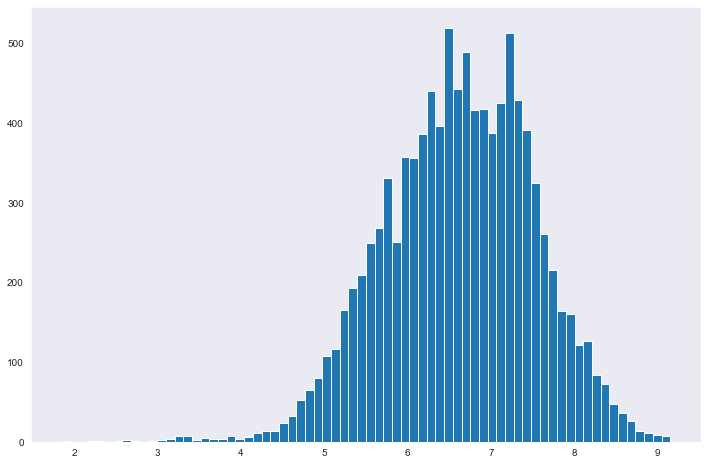

In [41]:
sns.set_style("dark")
plt.figure(figsize=(12,8))
plt.hist(df['mean'], bins=70,)
plt.show

In [42]:
fig = px.pie(data, 'media_type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

*Notes:* Naturally TV has higher percentage as anime media.


<AxesSubplot:>

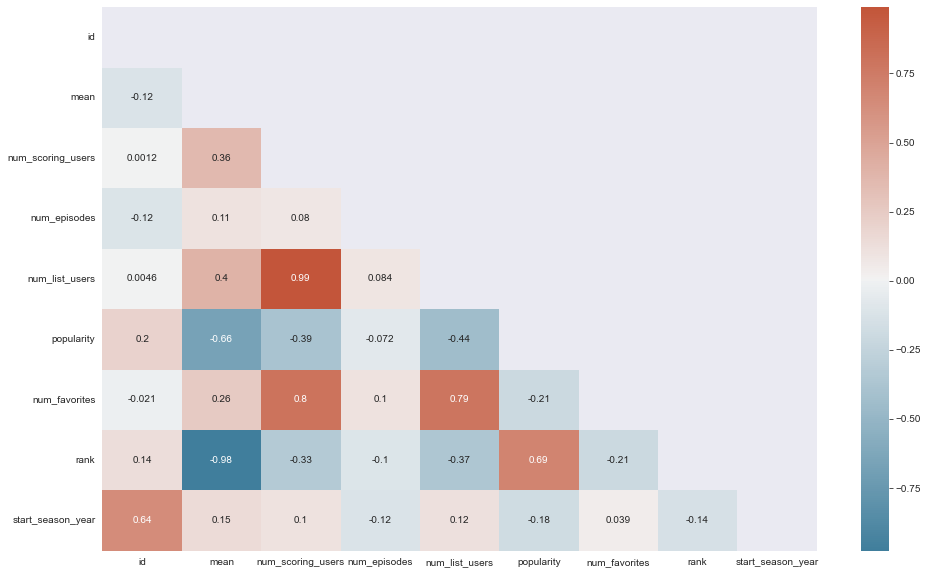

In [43]:
corr = data.corr()

# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(16, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

*Notes:*  So, basically interesting factors that are affecting the mean factor are : rank, popularity, num_scoring_users, ignore num_list_users for now till further investigation of difference.

In [44]:
fig = px.histogram(data[data['start_date'].dt.year >= 1980], x='start_date', color='media_type')
fig.update_layout(bargap=0.1)

*Notes:* Obviously 2016 was a good year for Otakus :3 specially summer-Autumn-Fall seasons, with 119 tv, 45 movie, 23 ova, 61 ona, 60 special and 41 music. (Gotta check watching list lmao).

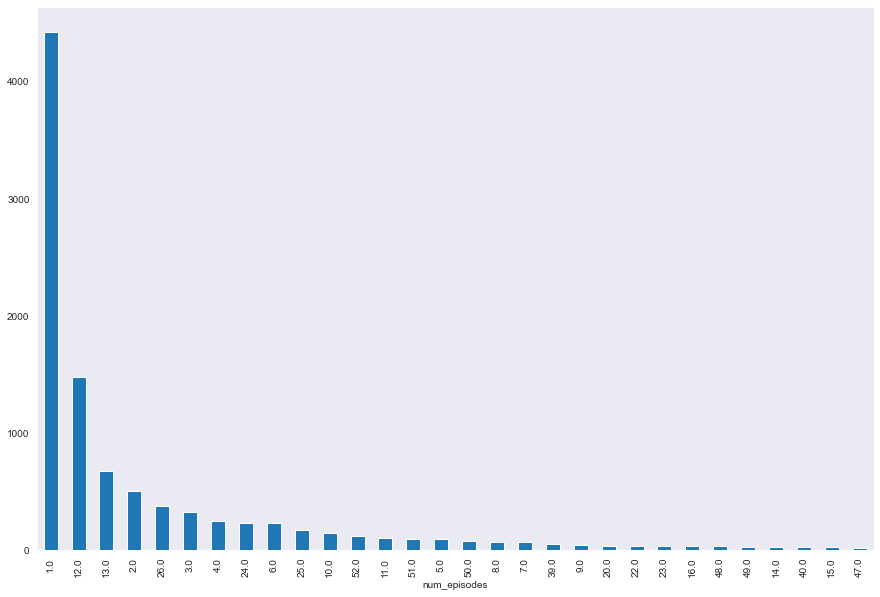

In [45]:
data.groupby('num_episodes')['id'].count().sort_values(ascending=False).head(30).plot(kind='bar', figsize=(15,10))
plt.show()

*Notes:* A lot of Movies (1 episode) that's why the spike, but the summation of all others are the other percentages of tv,ova,ona,... etc. most tv/specials are short 12 (episodes)/(season|title). </br>
*The fans of "When you have eliminated the impossible" teenager for 22+ years don't give up :(* </br>
*Gomu Gomu no guys don't be Sadge :(*

# 2- **MODELS TIME:** :3
![image info](https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/gettyimages-458406992-1538405221.jpg?crop=0.9xw:0.9xh;0,0&resize=256:*)


## ML Similarity Analysis:

### Synopsis Keyword Analysis:
*(NLP)* :
* KeyBERT.
* Spacy.
* tqdm.
* CountVectorizer.
* TF-IDF

In [46]:
import sweetviz as sv
#You could specify which variable in your dataset is the target for your model creation. We can specify it using the target_feat parameter.
data_report = sv.analyze(data)



                                             |          | [  0%]   00:00 -> (? left)


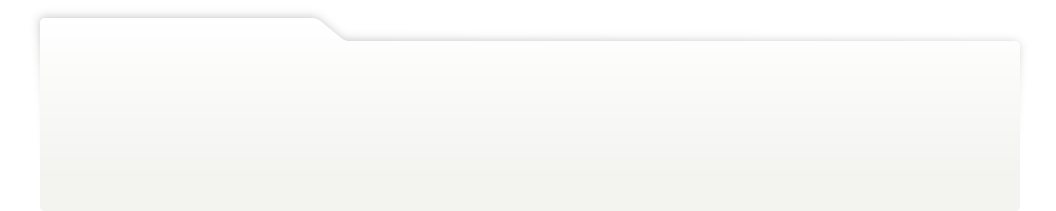
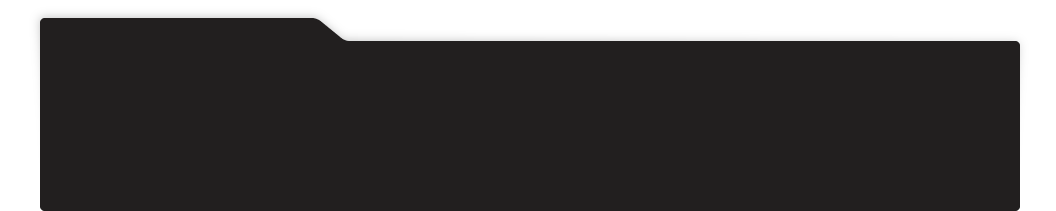
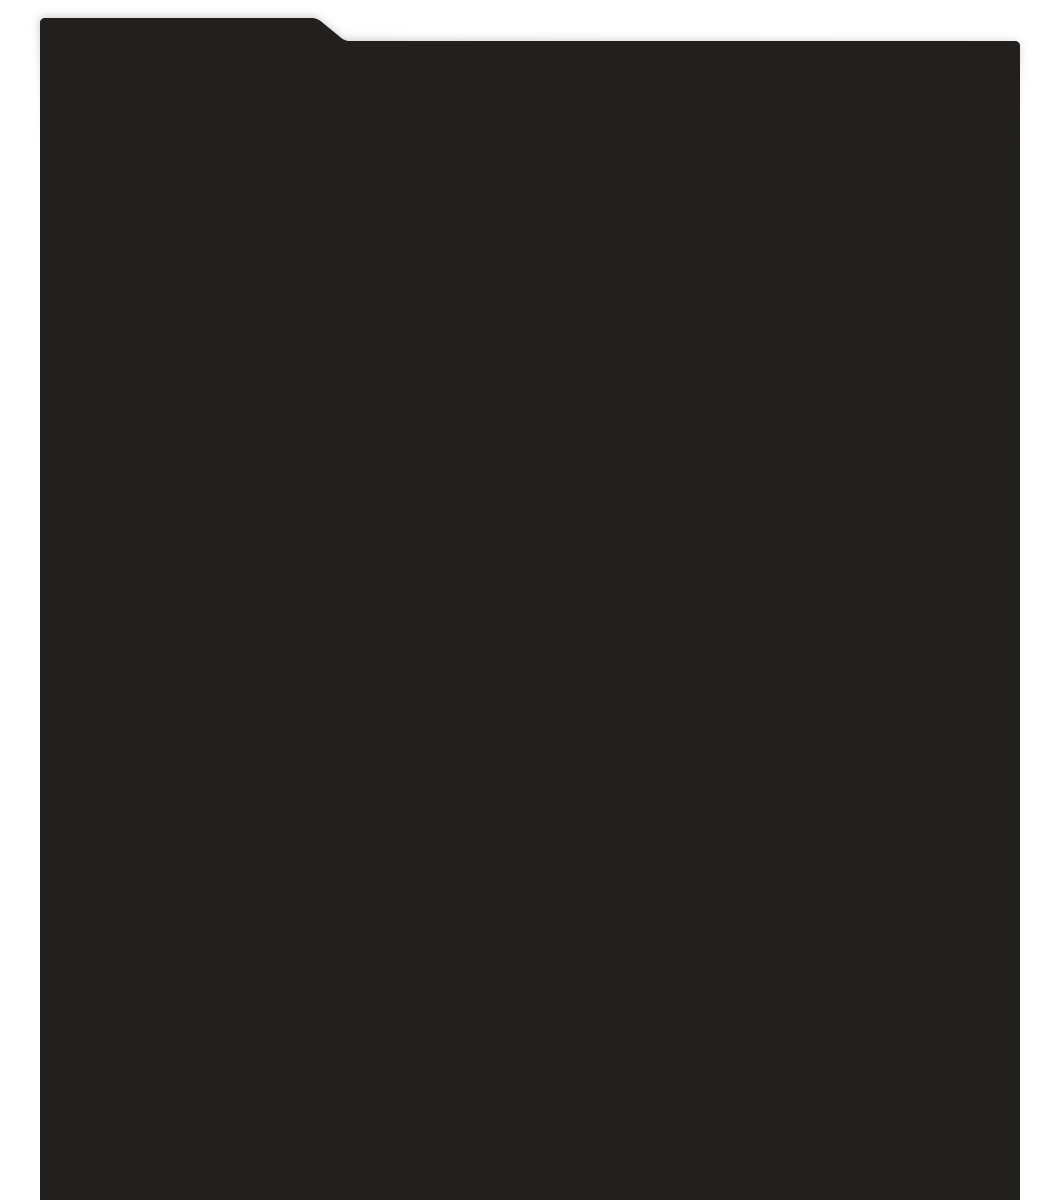
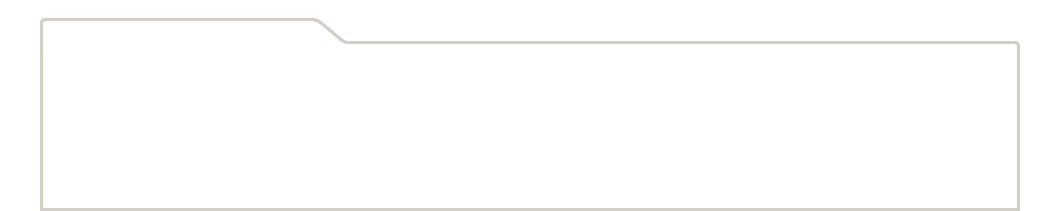
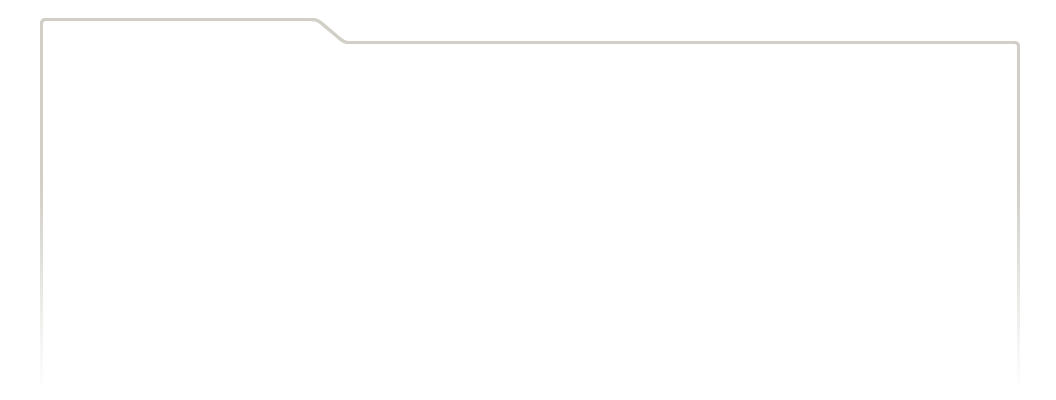
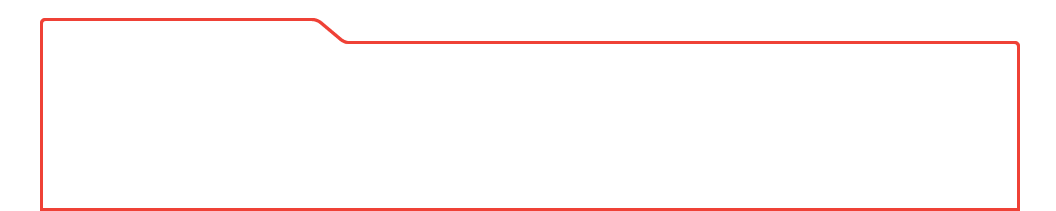
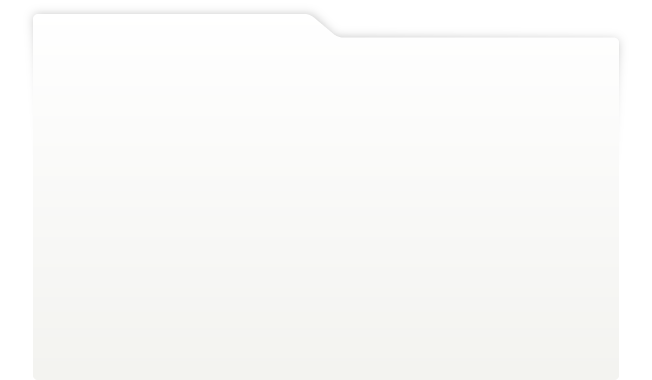
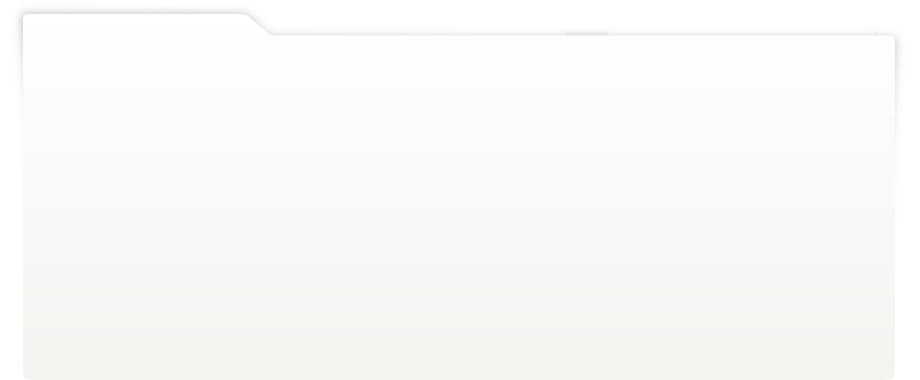
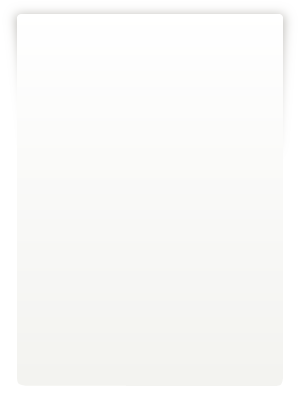
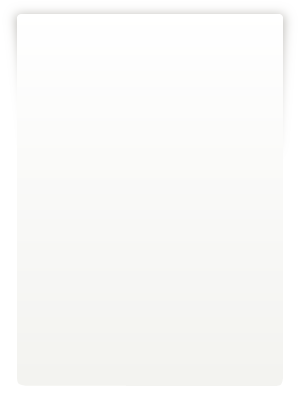
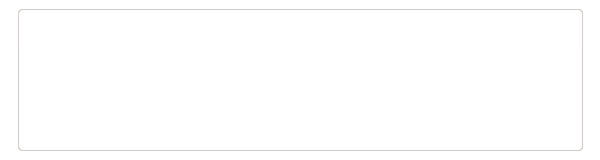
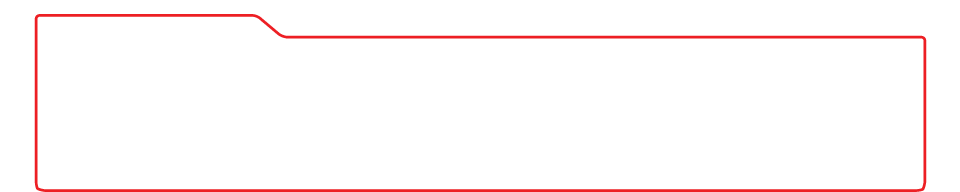
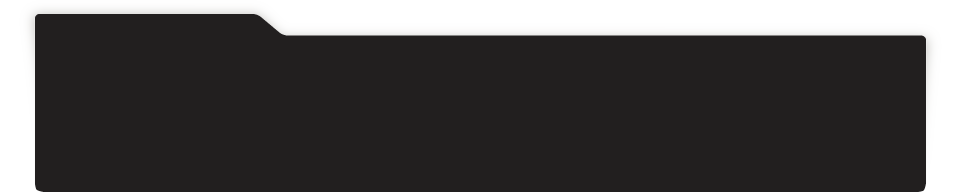
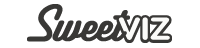
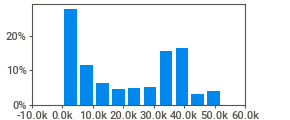
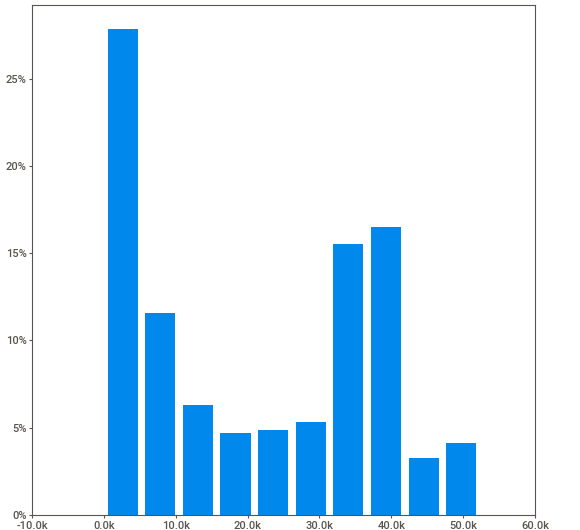
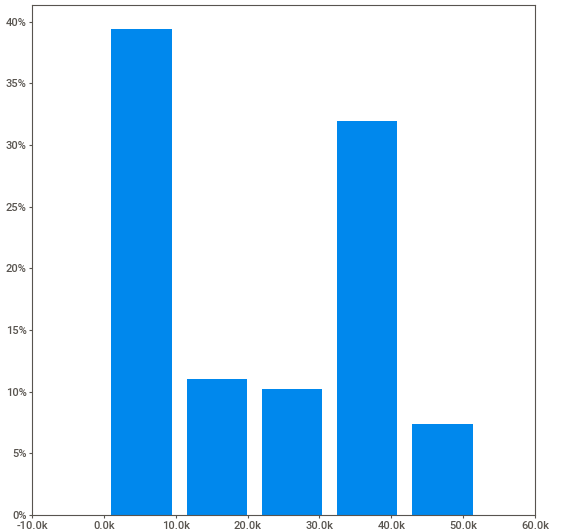
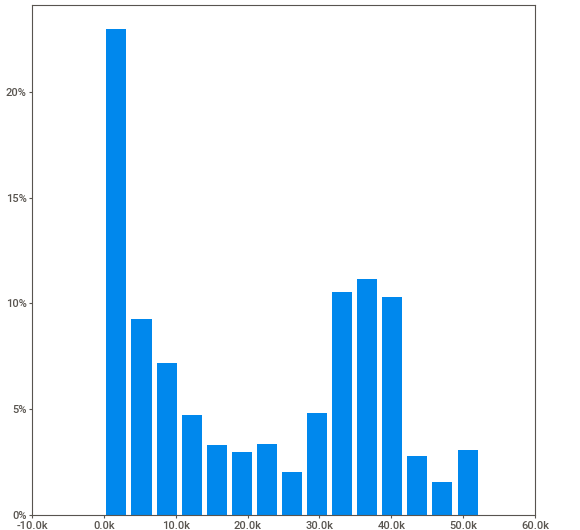
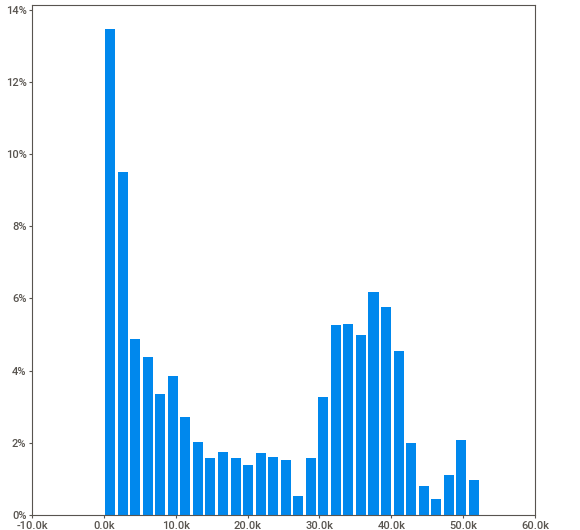
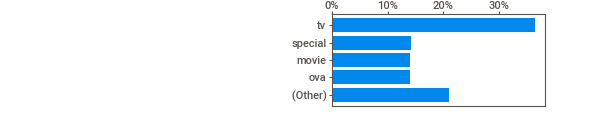
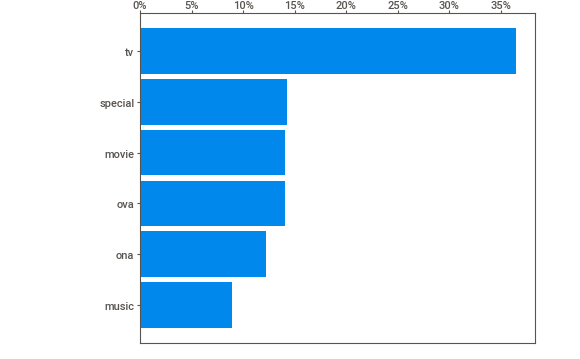
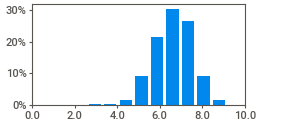
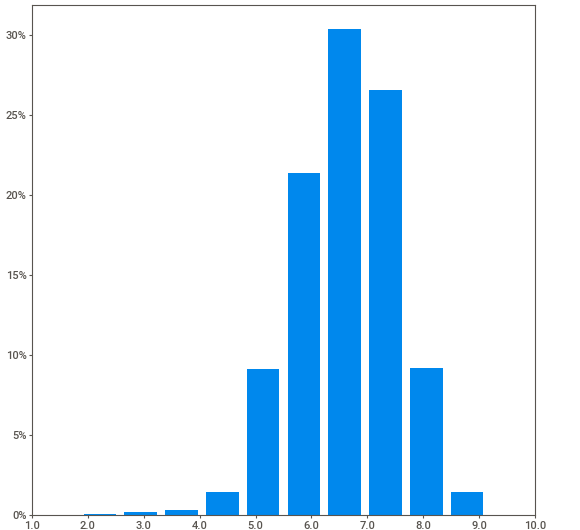
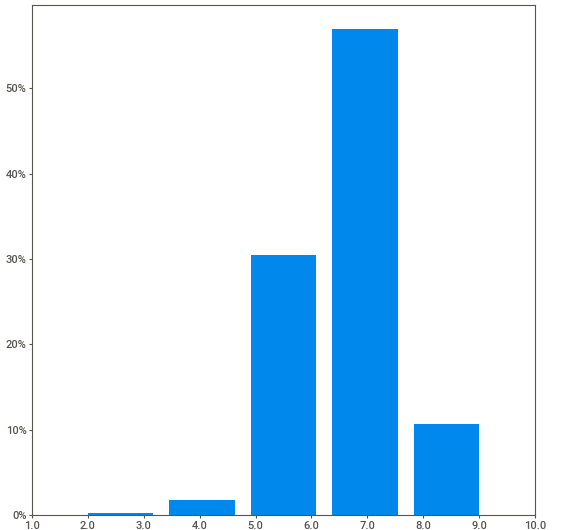
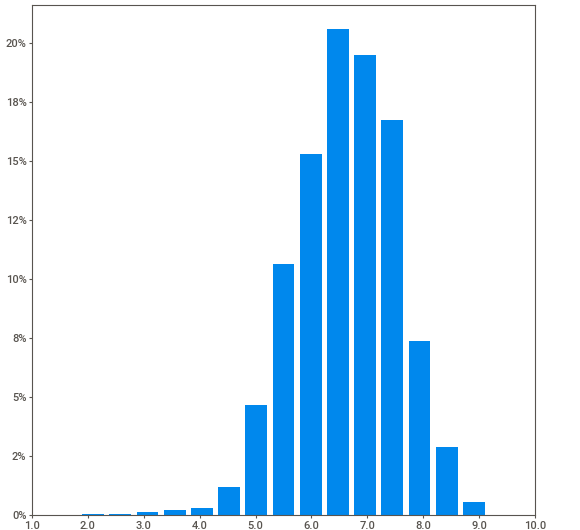
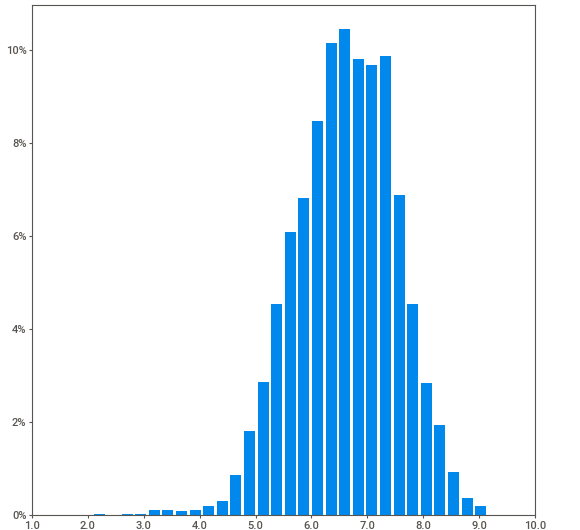
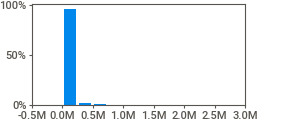
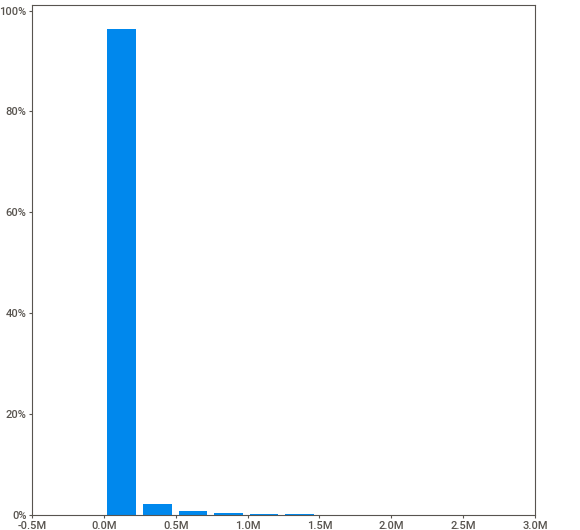
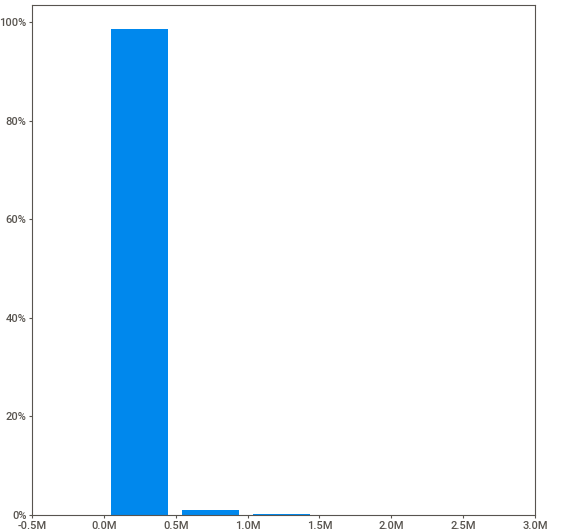
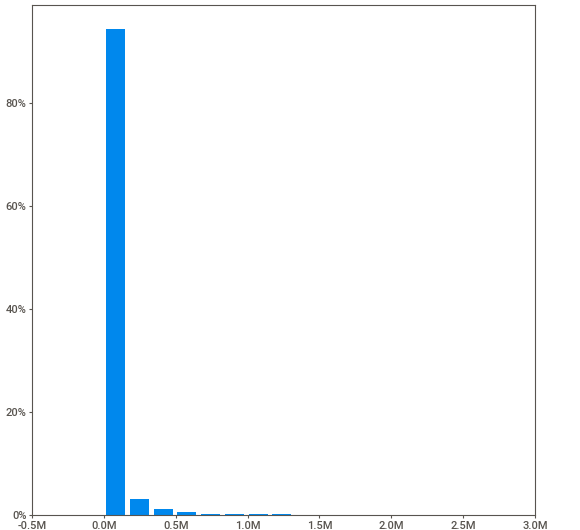
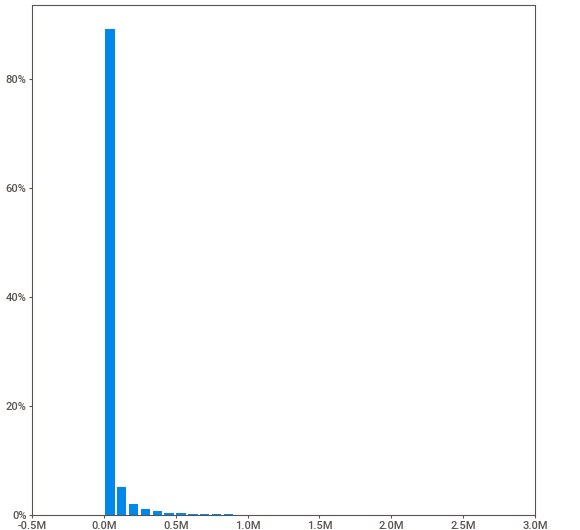
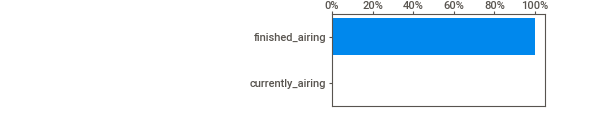
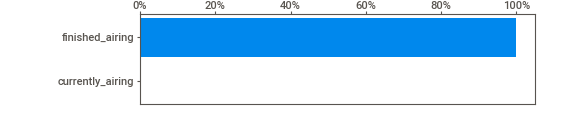
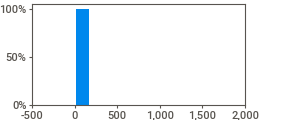
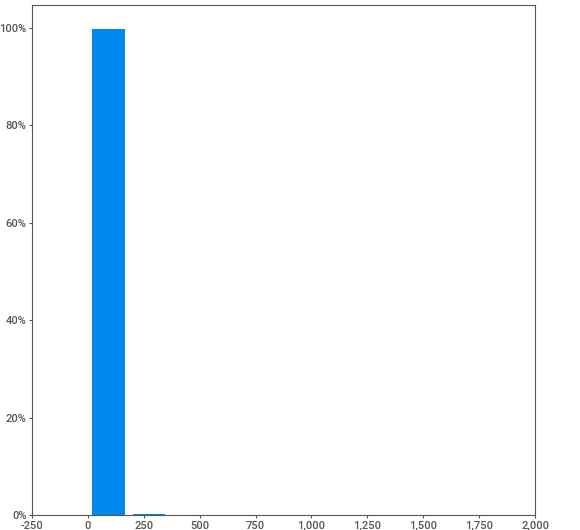
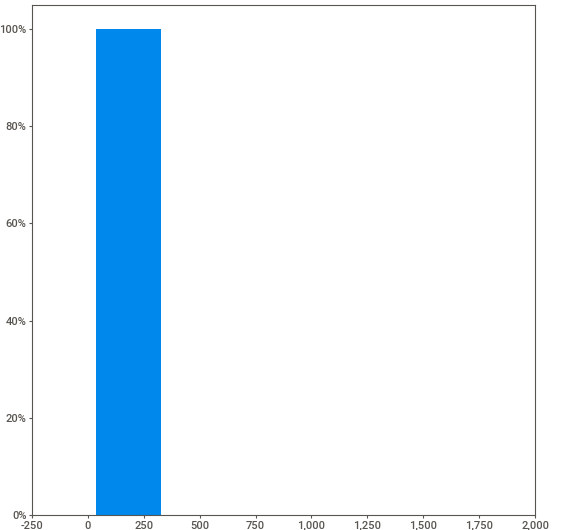
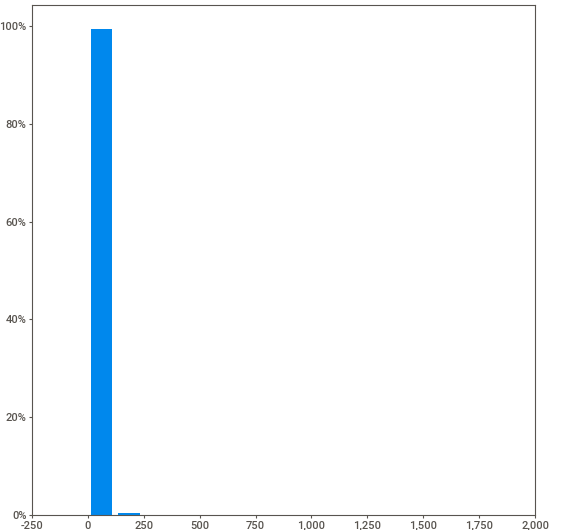
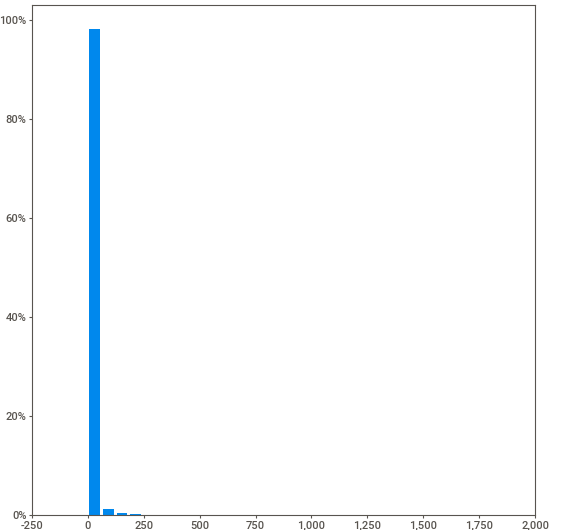
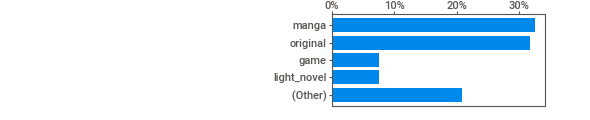
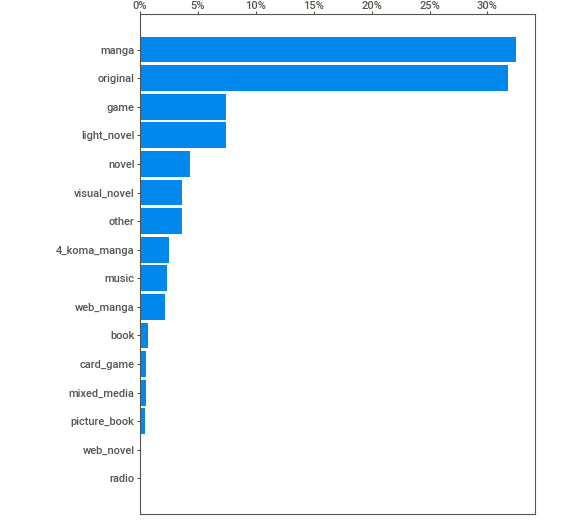
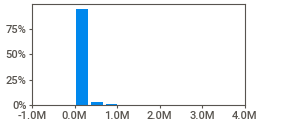
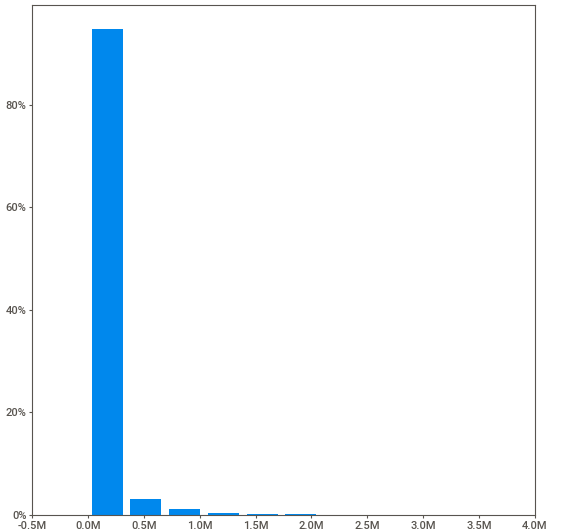
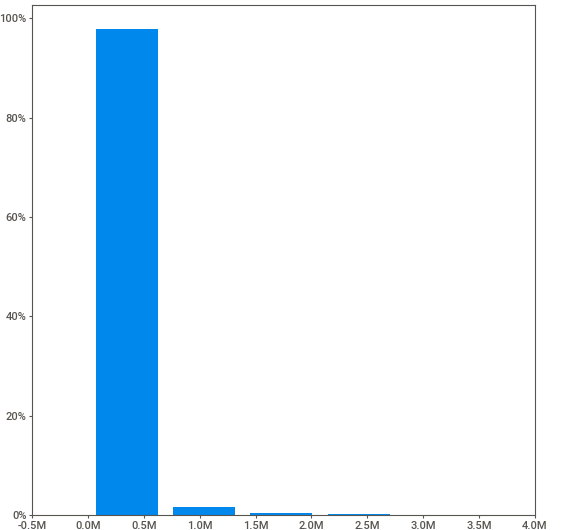
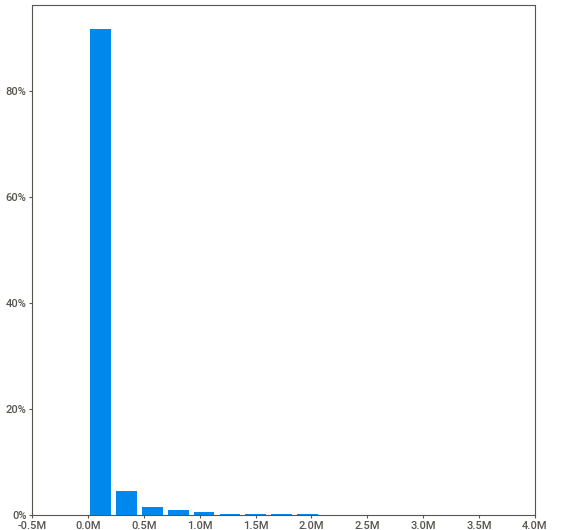
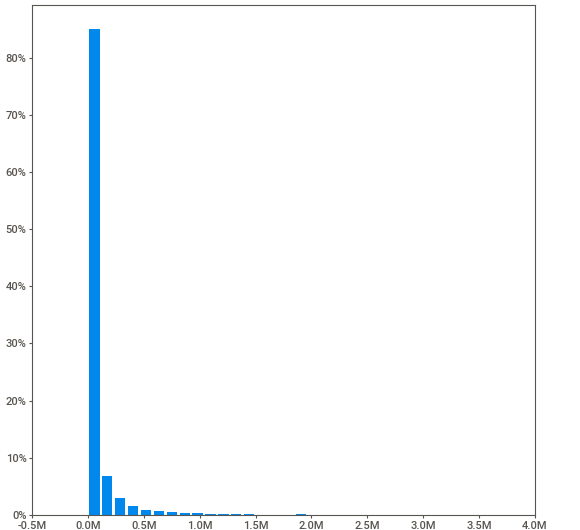
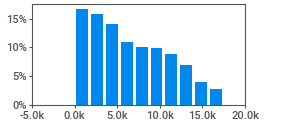
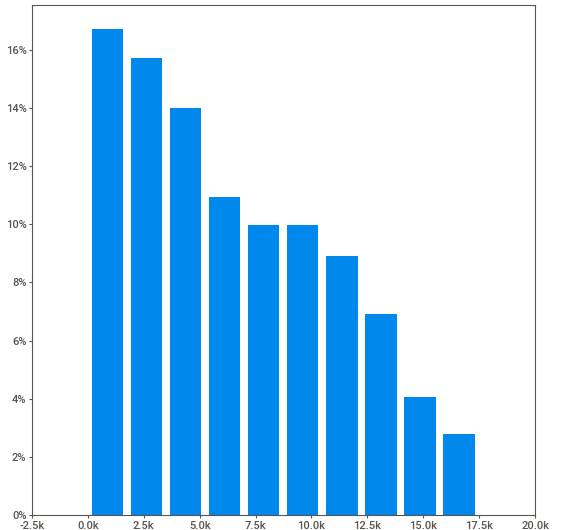
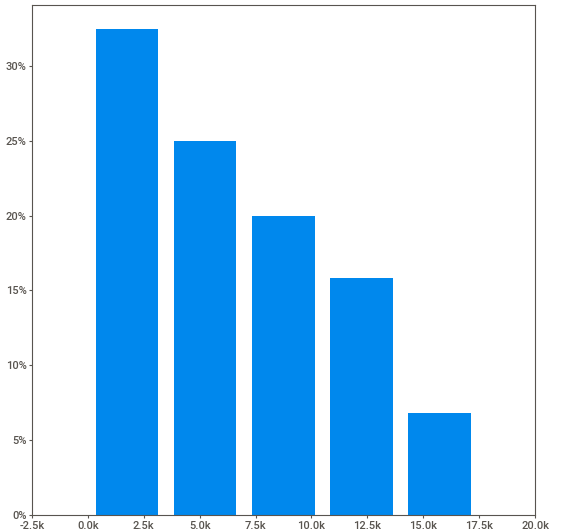
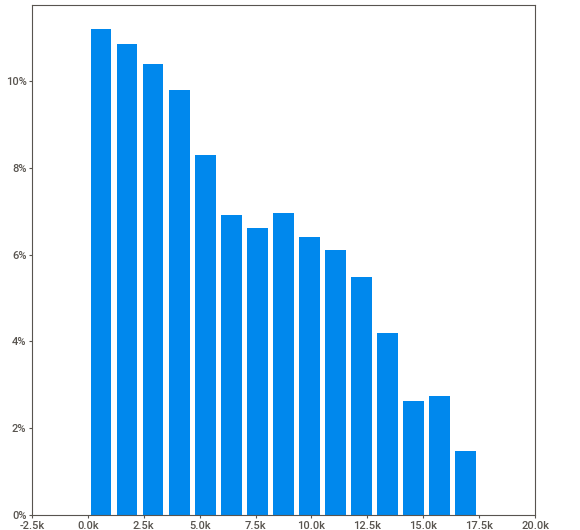
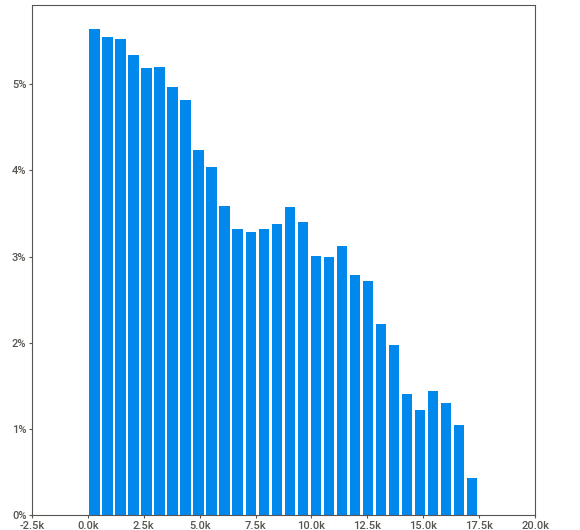
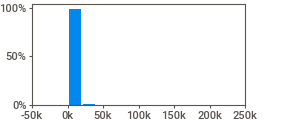
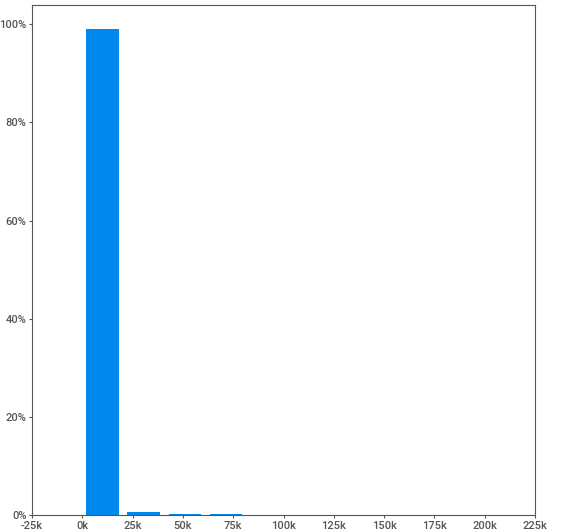
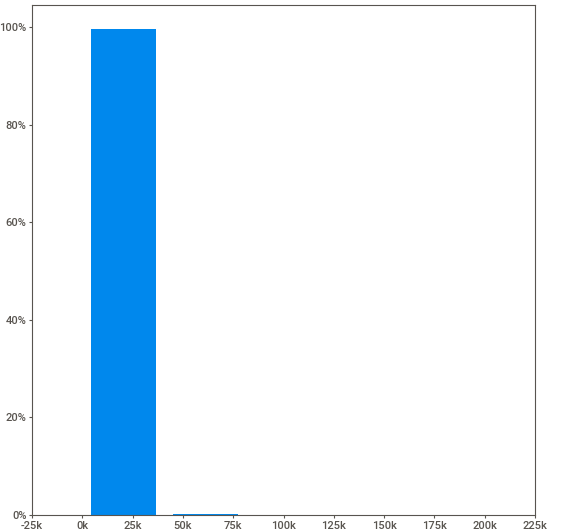
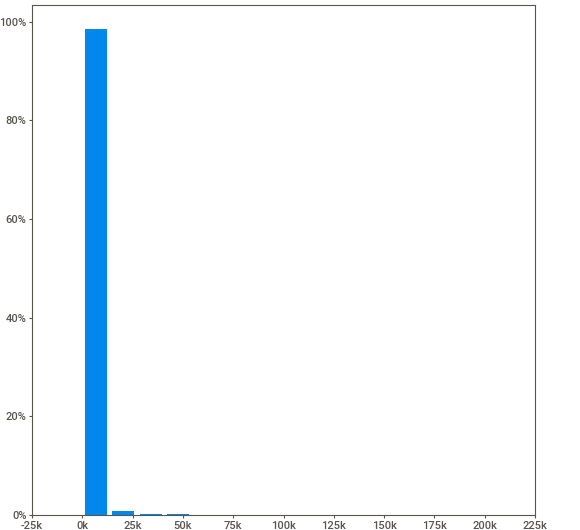
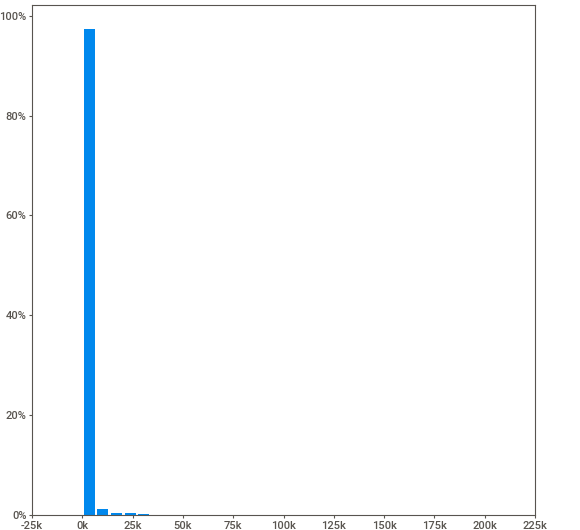
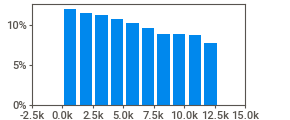
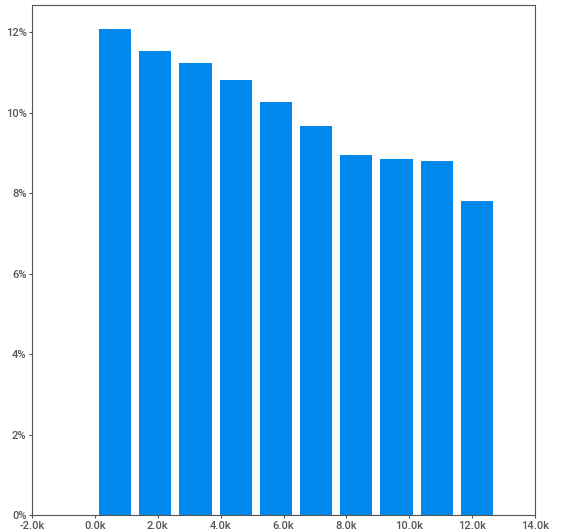
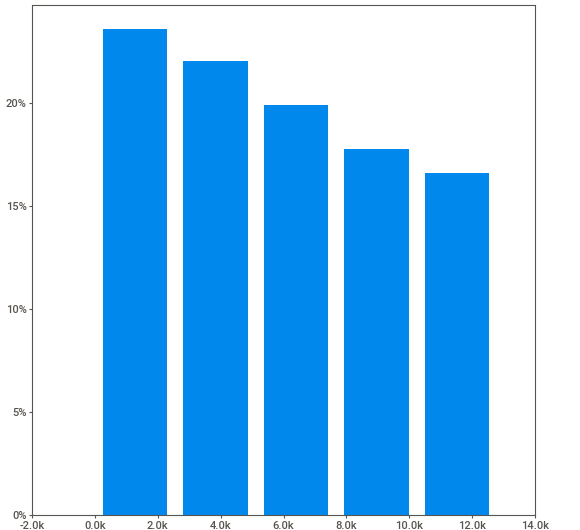
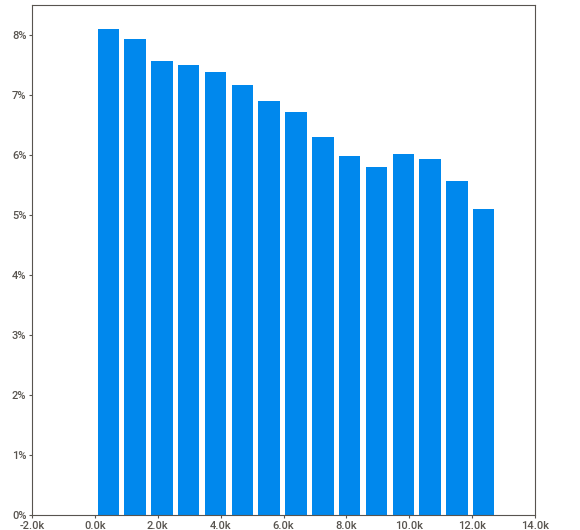
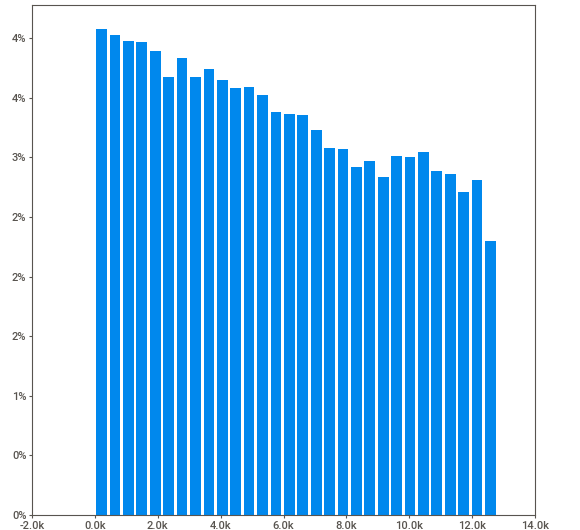
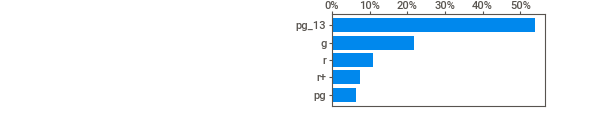
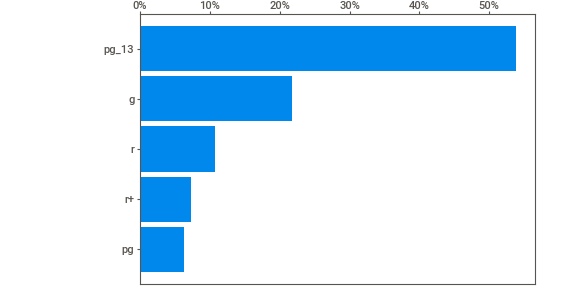
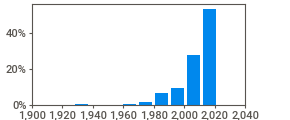
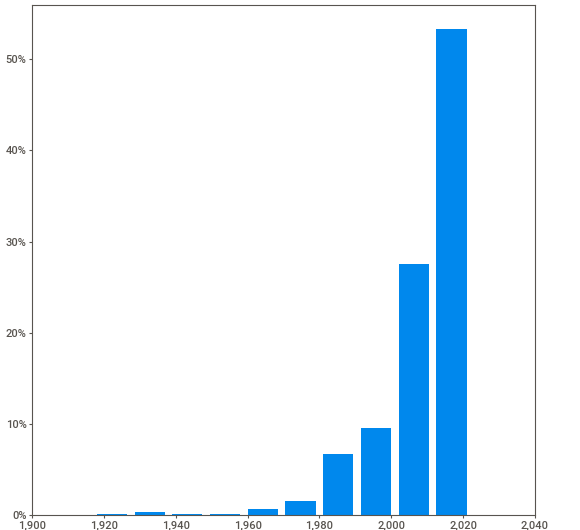
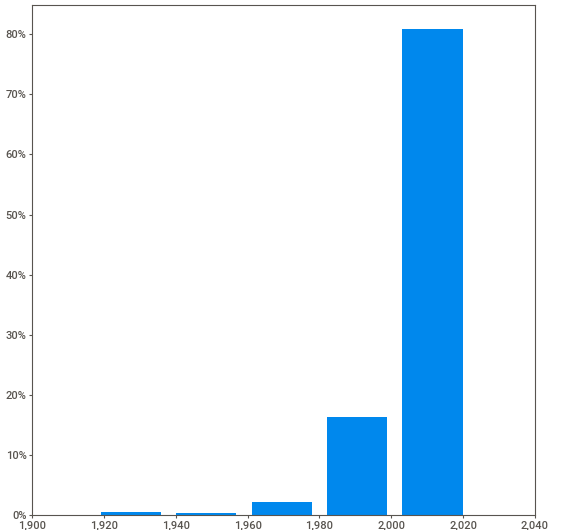
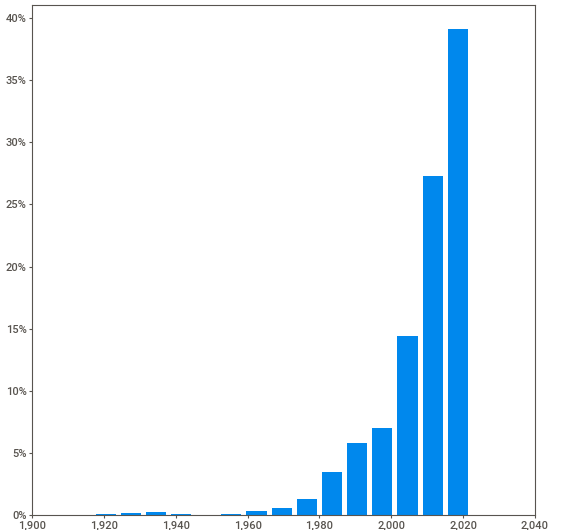
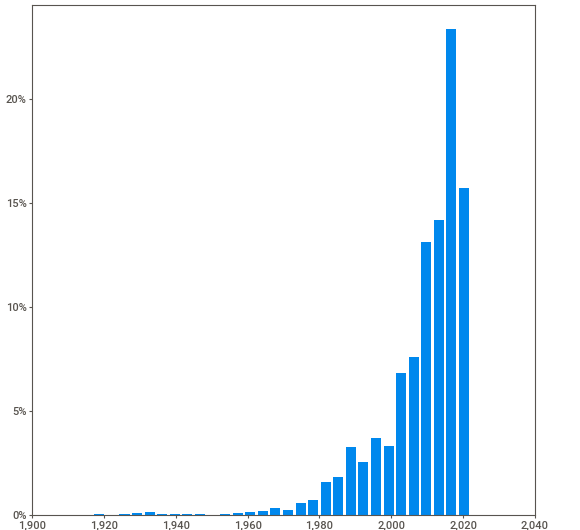
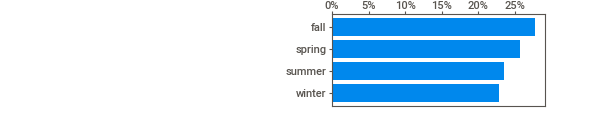
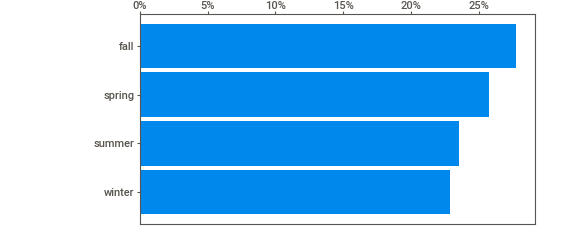
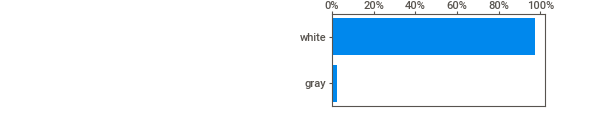
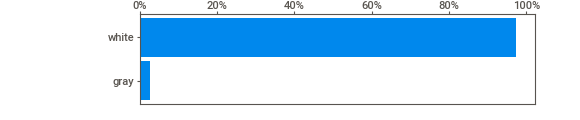
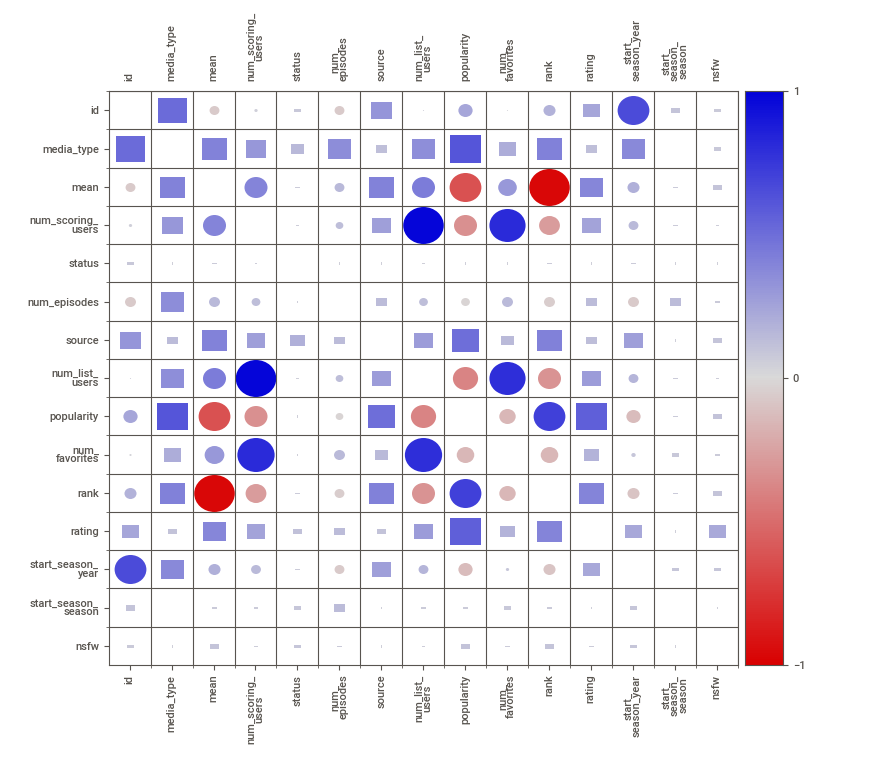
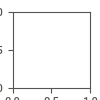

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [47]:
data_report.show_notebook(w=1500, h=900, scale=0.8)
data_report.show_html(scale=0.9)

### Cos-similarity:

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
data.dtypes


id                                   int64
title                               object
media_type                          object
mean                               float64
num_scoring_users                    int64
status                              object
num_episodes                       float64
start_date                  datetime64[ns]
end_date                    datetime64[ns]
source                              object
num_list_users                       int64
popularity                         float64
num_favorites                        int64
rank                               float64
average_episode_duration            object
rating                              object
start_season_year                  float64
start_season_season                 object
genres                              object
studios                             object
synopsis                            object
nsfw                                object
created_at                  datetime64[ns]
updated_at 

In [50]:
tfidf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['synopsis'] + data['genres'] + data['rating'] + data['studios']+data['media_type'])
tfidf_matrix.shape

(10287, 398481)

Using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. 

$cosine(x,y) = \frac{x. y^\intercal}{||x||.||y||}$

In [51]:
cos_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [52]:
data = data.reset_index()
titles = data['title']
indices = pd.Series(data.index, index=data['title'])

In [53]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    anime_indices = [i[0] for i in sim_scores]
    return titles.iloc[anime_indices]
data['title'][4]

'Shingeki no Kyojin'

In [54]:
cos_results=get_recommendations('Death Note').head(8)
cos_results

1354                 Death Note: Rewrite
7591                    Dororon Enma-kun
6942                               gdMen
6371                      Kurayami Santa
6581                  Dia Horizon (Kabu)
71                          Death Parade
2276              Matantei Loki Ragnarok
2667    Ai Tenshi Densetsu Wedding Peach
Name: title, dtype: object

Not so close recommendations but good start


#### **Featuring keywords and similarities:**

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(","), binary='true')
#vectors=[None]*len(keywords)

In [56]:
dfsyn['keywords'].head(4)

0    [an alchemist, prosthetic limbs, the boys' jou...
1    [the hunter examination, gon, their own reason...
2    [eccentric scientist rintarou okabe, the "phon...
4    [sadistic god of death, light's, the meticulou...
Name: keywords, dtype: object

In [57]:
dfsyn.head()

,id,title,synopsis,nouns,genres,doc_clean,keywords,rating,media_type
0,5114,Fullmetal Alchemist: Brotherhood,After a horrific alchemy experiment goes wrong...,"[alchemy, a horrific alchemy experiment, broth...","['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","(after, a, horrific, alchemy, experiment, goes...","[an alchemist, prosthetic limbs, the boys' jou...",r,tv
1,11061,Hunter x Hunter (2011),Hunters devote themselves to accomplishing haz...,"[hunters, hazardous tasks, the world's, the wo...","['Action', 'Adventure', 'Fantasy', 'Shounen']","(hunters, devote, themselves, to, accomplishin...","[the hunter examination, gon, their own reason...",pg_13,tv
2,9253,Steins;Gate,Eccentric scientist Rintarou Okabe has a never...,"[eccentric scientist, rintarou, eccentric scie...","['Drama', 'Psychological', 'Sci-Fi', 'Suspense...","(eccentric, scientist, rintarou, okabe, has, a...","[eccentric scientist rintarou okabe, the ""phon...",pg_13,tv
4,1535,Death Note,"Brutal murders, petty thefts, and senseless vi...","[petty thefts, and senseless violence, sensele...","['Psychological', 'Shounen', 'Supernatural', '...","(brutal, murders, ,, petty, thefts, ,, and, se...","[sadistic god of death, light's, the meticulou...",r,tv
5,16498,Shingeki no Kyojin,"Centuries ago, mankind was slaughtered to near...","[centuries, mankind, extinction, monstrous hum...","['Action', 'Drama', 'Gore', 'Military', 'Shoun...","(centuries, ago, ,, mankind, was, slaughtered,...","[monstrous humanoid creatures called titans, t...",r,tv


In [58]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

# Apply clean_data function to your features.
features = ['genres', 'keywords', 'rating', 'media_type']

for feature in features:
    dfsyn[feature] = dfsyn[feature].apply(clean_data)

In [59]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['genres']) + ' ' + x['rating'] + ' ' + ' '.join(x['media_type'])
dfsyn['soup'] = dfsyn.apply(create_soup, axis=1)

In [60]:
dfsyn['soup'].head()

0    analchemist prostheticlimbs theboys'journey th...
1    thehunterexamination gon theirownreason thevin...
2    eccentricscientistrintarouokabe the"phonemicro...
4    sadisticgodofdeath light's themeticulousmaster...
5    monstroushumanoidcreaturescalledtitans theprot...
Name: soup, dtype: object

In [61]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cos_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cos_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return dfsyn['title'].iloc[anime_indices]

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(dfsyn['soup'])


from sklearn.metrics.pairwise import cosine_similarity

cos_sim2 = cosine_similarity(count_matrix, count_matrix)
dfsyn = dfsyn.reset_index()
indices = pd.Series(dfsyn.index, index=dfsyn['title'])

In [63]:
cos2_results=get_recommendations('Death Note', cos_sim2)
len(cos2_results),cos2_results


(10,
 1354                 Death Note: Rewrite
 7591                    Dororon Enma-kun
 6942                               gdMen
 6371                      Kurayami Santa
 6581                  Dia Horizon (Kabu)
 71                          Death Parade
 2276              Matantei Loki Ragnarok
 2667    Ai Tenshi Densetsu Wedding Peach
 79                            Soul Eater
 8485           Otogi Juushi Akazukin OVA
 Name: title, dtype: object)

## DL Recommender net:

In [65]:
import tensorflow as tf
tf.data.experimental.enable_debug_mode()

In [66]:
from keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau
import keras
from keras import layers 
import tensorflow as tf
from keras.models import Model
from keras.optimizers import Adam

In [67]:
rdf=pd.read_csv(r"../data-history/ratings-2020/rating_complete.csv")
n = 10

# Count the lines or use an upper bound
num_lines = sum(1 for l in open(r"../data-history/ratings-2020/rating_complete.csv"))

# The row indices to skip - make sure 0 is not included to keep the header!
skip_idx = [x for x in range(1, num_lines) if x % n != 0]

# Read the data
#rdf = pd.read_csv(r"../data-history/ratings-2020/rating_complete.csv", skiprows=skip_idx )
print(rdf.shape)
rdf.columns

(1048575, 3)


Index(['user_id', 'id', 'rating'], dtype='object')

In [68]:
# Removing Duplicated Rows
duplicates = rdf.duplicated()

if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    rdf = rdf[~duplicates]

print('> {} duplicates'.format(rdf.duplicated().sum()))

> 0 duplicates


In [69]:
# Scaling BTW (0 , 1.0)
min_rating = min(rdf['rating'])
max_rating = max(rdf['rating'])
rdf['rating'] = rdf["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype(np.float64)

AvgRating = np.mean(rdf['rating'])
print('Avg', AvgRating)

Avg 0.727308860959475


In [70]:
rdf.head(2)

,user_id,id,rating
0,0,430,0.888889
1,0,1004,0.444444


In [71]:
g = rdf.groupby('user_id')['rating'].count()
top_users = g.dropna().sort_values(ascending=False)[:20]
top_r = rdf.join(top_users, rsuffix='_r', how='inner', on='user_id')

g = rdf.groupby('id')['rating'].count()
top_animes = g.dropna().sort_values(ascending=False)[:20]
top_r = top_r.join(top_animes, rsuffix='_r', how='inner', on='id')

pd.crosstab(top_r.user_id, top_r.id, top_r.rating, aggfunc=np.sum)

id,20,199,226,1535,1575,2904,4224,5114,6547,8074,9253,10620,11757,16498,19815,20507,22319,30276,31964,32281
user_id,,,,,,,,,,,,,,,,,,,,
781,0.666667,1.000000,0.666667,1.000000,0.555556,NaN,0.666667,NaN,0.888889,0.777778,1.000000,0.888889,0.555556,0.888889,0.666667,0.666667,0.666667,1.000000,0.777778,0.888889
853,0.888889,NaN,0.666667,1.000000,1.000000,1.000000,NaN,1.000000,0.222222,0.222222,0.555556,0.666667,0.000000,0.888889,NaN,0.111111,0.888889,0.888889,0.777778,NaN
890,0.666667,1.000000,0.555556,0.888889,0.666667,0.666667,0.333333,0.888889,0.666667,0.555556,NaN,0.555556,0.000000,0.666667,NaN,NaN,NaN,0.666667,NaN,0.888889
943,0.777778,NaN,1.000000,0.777778,NaN,NaN,1.000000,NaN,1.000000,0.777778,1.000000,0.888889,0.888889,1.000000,0.888889,NaN,1.000000,1.000000,1.000000,1.000000
1177,0.777778,1.000000,0.888889,0.888889,1.000000,1.000000,0.888889,1.000000,0.777778,0.666667,0.888889,0.777778,0.666667,1.000000,0.666667,0.666667,0.666667,0.888889,0.777778,1.000000
1393,NaN,0.777778,0.777778,0.888889,0.777778,0.888889,0.111111,NaN,0.777778,0.777778,NaN,0.555556,0.666667,0.666667,1.000000,0.777778,0.666667,0.777778,0.888889,0.888889
1397,NaN,0.777778,0.666667,0.888889,0.888889,0.888889,0.888889,1.000000,0.777778,NaN,0.777778,0.666667,0.777778,0.777778,0.666667,0.777778,0.666667,0.666667,0.777778,1.000000
1469,0.666667,0.888889,0.777778,0.666667,0.888889,0.888889,0.555556,0.777778,0.666667,0.888889,0.222222,0.555556,0.888889,0.888889,0.888889,0.444444,0.444444,0.888889,0.555556,0.777778
1946,0.777778,1.000000,0.888889,0.777778,0.777778,0.777778,1.000000,0.777778,1.000000,1.000000,0.777778,0.888889,1.000000,0.888889,0.888889,0.777778,0.666667,0.888889,0.777778,0.777778


In [72]:
anime_ids = rdf["id"].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
n_animes = len(anime2anime_encoded)
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}

rdf["anime"] = rdf["id"].map(anime2anime_encoded)

user_ids = rdf["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
n_users = len(user2user_encoded)
rdf["user"] = rdf["user_id"].map(user2user_encoded)


print("Num of users: {}, Num of animes: {}".format(n_users, n_animes))
print("Min rating: {}, Max rating: {}".format(min(rdf['rating']), max(rdf['rating'])))

Num of users: 5890, Num of animes: 12164
Min rating: 0.0, Max rating: 1.0


In [73]:
tmatrix = np.zeros((n_users, n_animes))
tmatrix.shape

(5890, 12164)

In [77]:
rdf.columns

Index(['user_id', 'id', 'rating', 'anime', 'user'], dtype='object')

In [76]:
for line in rdf.itertuples():
    tmatrix[line[1]-1,line[2]-1] = line[3]

IndexError: index 22534 is out of bounds for axis 1 with size 12164

In [ ]:
tmatrix[1]

array([0., 0., 0., ..., 0., 0., 0.])

### **Pair wise distance** :

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
user_distances = pairwise_distances(tmatrix, metric="cosine")

# ".T" below is to transpose our 2D matrix.
tmatrix_transpose = tmatrix.T
anime_distances = pairwise_distances(tmatrix_transpose, metric="cosine")

user_distances.shape, anime_distances.shape

((5890, 5890), (12164, 12164))

In [ ]:
user_similarity = 1 - user_distances
anime_similarity = 1 - anime_distances

In [ ]:
data.columns

Index(['level_0', 'index', 'id', 'title', 'media_type', 'mean',
       'num_scoring_users', 'status', 'num_episodes', 'start_date', 'end_date',
       'source', 'num_list_users', 'popularity', 'num_favorites', 'rank',
       'average_episode_duration', 'rating', 'start_season_year',
       'start_season_season', 'genres', 'studios', 'synopsis', 'nsfw',
       'created_at', 'updated_at'],
      dtype='object')

In [ ]:
data.head(5)


,level_0,index,id,title,media_type,mean,num_scoring_users,status,num_episodes,start_date,...,average_episode_duration,rating,start_season_year,start_season_season,genres,studios,synopsis,nsfw,created_at,updated_at
0,0,0,5114,Fullmetal Alchemist: Brotherhood,tv,9.13,1866190,finished_airing,64.0,2009-04-05,...,0 days 00:24:20,r,2009.0,spring,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",['Bones'],After a horrific alchemy experiment goes wrong...,white,2008-08-21 03:35:22,2022-04-18 05:06:13
1,1,1,11061,Hunter x Hunter (2011),tv,9.05,1503967,finished_airing,148.0,2011-10-02,...,0 days 00:23:37,pg_13,2011.0,fall,"['Action', 'Adventure', 'Fantasy', 'Shounen']",['Madhouse'],Hunters devote themselves to accomplishing haz...,white,2011-07-27 08:41:39,2022-04-18 05:11:21
2,2,2,9253,Steins;Gate,tv,9.08,1249145,finished_airing,24.0,2011-04-06,...,0 days 00:24:20,pg_13,2011.0,spring,"['Drama', 'Psychological', 'Sci-Fi', 'Suspense...",['White Fox'],Eccentric scientist Rintarou Okabe has a never...,white,2010-07-26 09:23:40,2022-05-01 21:24:42
3,3,4,1535,Death Note,tv,8.62,2444358,finished_airing,37.0,2006-10-04,...,0 days 00:23:00,r,2006.0,fall,"['Psychological', 'Shounen', 'Supernatural', '...",['Madhouse'],"Brutal murders, petty thefts, and senseless vi...",white,2006-10-04 03:39:19,2022-04-18 04:59:29
4,4,5,16498,Shingeki no Kyojin,tv,8.53,2477100,finished_airing,25.0,2013-04-07,...,0 days 00:24:00,r,2013.0,spring,"['Action', 'Drama', 'Gore', 'Military', 'Shoun...",['Wit Studio'],"Centuries ago, mankind was slaughtered to near...",white,2012-12-05 12:03:21,2022-04-18 05:00:25


In [ ]:
idx_to_anime = {}
for line in data.itertuples():
        idx_to_anime[(line[1])-1] = line[4]
anime_to_idx = {v: k for k, v in idx_to_anime.items()}

In [ ]:
anime_idx= anime_to_idx['Death Note']

def top_k_similar(similarity, mapper , anime_idx, k=8):
      return [mapper[x] for x in np.argsort(similarity[anime_idx,:])[:-k-2:-1]]

In [ ]:
pair_results= top_k_similar(anime_similarity,idx_to_anime ,anime_idx,k=8)
print(pair_results)

KeyError: 12163

In [64]:
def jaccard_similarity(a, b):
    # convert to set
    a = set(a)
    b = set(b)
    # calucate jaccard similarity
    j = float(len(a.intersection(b))) / len(a.union(b))
    return j
jaccard_similarity(pair_results,cos2_results)
jaccard_similarity(cos_results,cos2_results)

NameError: name 'pair_results' is not defined

**zenzen wakaranaaaaaiiiii !!!!!!!!!!!!!** :"D pair-wise distance results not related to cosine Similarity results no intersections.

### *Trying The DNN* :

In [ ]:
rdf.shape

(1048575, 3)

In [ ]:
rdf.isnull().sum()

user_id    0
id         0
rating     0
dtype: int64

In [ ]:
len(rdf['user'])

1048575

In [ ]:
df.filter(regex='^media_type_',axis=1).head(2), df.filter(regex='^source_',axis=1).head(2)

(   media_type_movie  media_type_music  media_type_ona  media_type_ova  \
 0                 0                 0               0               0   
 1                 0                 0               0               0   
 
    media_type_special  media_type_tv  
 0                   0              1  
 1                   0              1  ,
    source_4_koma_manga  source_book  source_card_game  source_game  \
 0                    0            0                 0            0   
 1                    0            0                 0            0   
 
    source_light_novel  source_manga  source_mixed_media  source_music  \
 0                   0             1                   0             0   
 1                   0             1                   0             0   
 
    source_novel  source_original  source_other  source_picture_book  \
 0             0                0             0                    0   
 1             0                0             0                    0   


In [ ]:
data['id'].values[1],data['popularity'].values[1]

(11061, 10.0)

In [ ]:
dfdl =pd.DataFrame()

In [ ]:
dfdl_ids = data["id"].tolist()
dfdlid_encoded = {x: i for i, x in enumerate(dfdl_ids)}
n_animes = len(dfdlid_encoded)
id_encoded2id = {i: x for i, x in enumerate(dfdl_ids)}
dfdl["id"] = data["id"].map(dfdlid_encoded)

dfdl_mean = data["mean"].tolist()
dfdl_mean_encoded = {x: i for i, x in enumerate(dfdl_mean)}
mean_encoded2mean = {i: x for i, x in enumerate(dfdl_mean)}
n_users = len(dfdl_mean_encoded)
dfdl["mean"] = data["mean"].map(dfdl_mean_encoded)

dfdl_pop = data["popularity"].tolist()
user2user_encoded = {x: i for i, x in enumerate(dfdl_pop)}
user_encoded2user = {i: x for i, x in enumerate(dfdl_pop)}
n_users = len(user2user_encoded)
dfdl["popularity"] = data["populary"].map(user2user_encoded)

SyntaxError: unmatched ']' (1651603637.py, line 11)

In [ ]:

x1 = rdf[['user', 'anime']].values 

#x2=  data[['id'],['popularity']].values
x3=data[['mean'],['num_scoring_users']].values
x4=data['rank'].tolist(),data['num_favorites'].tolist()
x5= df.filter(regex='^media_type_',axis=1).values[i]
x6= df.filter(regex='^source_',axis=1).values[i]

y = rdf["rating"]
# Split
test_set_size = 250000 #10k for test set
train_indices = rdf_sampled.shape[0] - test_set_size 
len(x1),len(x2),len(x2[1]),len(x3),len(x3[1]),len(x4),len(x4[1]),len(y),


InvalidIndexError: (['mean'], ['num_scoring_users'])

In [ ]:
type(rdf['user']),type(data['id']),type(data['popularity'])

[1866190,
 1503967,
 1249145,
 2444358,
 2477100,
 1263421,
 1440773,
 937852,
 1670281,
 1723777,
 1204121,
 1393319,
 841984,
 824558,
 1240842,
 1076971,
 1753128,
 1076605,
 612629,
 1964709,
 1261057,
 977421,
 1983189,
 359936,
 1255190,
 830954,
 1839042,
 1323568,
 1074430,
 684863,
 1681437,
 679918,
 1409797,
 1194060,
 939713,
 1211299,
 948648,
 1127594,
 310944,
 1078963,
 691049,
 621232,
 718794,
 871452,
 653325,
 921045,
 578342,
 612481,
 923154,
 768879,
 786384,
 907562,
 1028515,
 1123856,
 1160883,
 621025,
 1124354,
 626418,
 894298,
 790171,
 465084,
 1146146,
 566823,
 631017,
 1044331,
 395619,
 313538,
 765358,
 708039,
 457587,
 1178324,
 901529,
 655134,
 850806,
 577057,
 522466,
 255301,
 835389,
 533299,
 780333,
 887588,
 727922,
 791551,
 302375,
 212853,
 363967,
 588839,
 520692,
 917452,
 817644,
 292545,
 823638,
 330143,
 357345,
 249885,
 590033,
 525550,
 563606,
 260271,
 668548,
 327487,
 820590,
 877219,
 598357,
 553485,
 557383,
 295513,
 1

In [ ]:
X3= x3[:,0] + x3[:,2] +x3[:,3] + x3[:,4] + x3[:,5] + x3[:,1] 
X4=['None']*len(x4)*len(x4[1])
for i in range(len(x4[1])):
    X4 =X4 + x4[:,i]

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U4'), dtype('uint8')) -> None

In [ ]:
X1_train, X1_test, y_train, y_test = (
    x1[:train_indices],
    x1[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [ ]:
print(len(X_train))
print(len(y_train))

798575
798575


In [ ]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [ ]:
print(len(X_train_array[0]))
print(len(X_test_array[0]))

798575
250000


In [ ]:
def recommender_net():
    embedding_size = 128
    
    user = Input(name = 'user', shape = [1])
    user_embedding = Embedding(name = 'user_embedding',
                    input_dim = n_users, 
                    output_dim = embedding_size)(user)
    
    anime = Input(name = 'anime', shape = [1])
    anime_embedding = Embedding(name = 'anime_embedding',
                    input_dim = n_animes, 
                    output_dim = embedding_size)(anime)
    #x = Concatenate()([user_embedding, anime_embedding])
    x = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, anime_embedding])
    x = Flatten()(x)
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation("sigmoid")(x)
    model = Model(inputs=[user, anime], outputs=x)
    model.compile(loss='binary_crossentropy', metrics=["mae", "mse"], optimizer='adam')
    
    return model

model1 = recommender_net()
model1.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 anime (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 128)       753920      ['user[0][0]']                   
                                                                                                  
 anime_embedding (Embedding)    (None, 1, 128)       1556992     ['anime[0][0]']                  
                                                                                            

In [ ]:
start_lr = 0.000001
min_lr = 0.000001
max_lr = 0.00005
batch_size = 10000
rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

checkpoint_filepath = './weights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                            save_weights_only=True,
                            monitor='val_loss',
                            mode='min',
                            save_best_only=True)

early_stopping = EarlyStopping(patience = 3, monitor='val_loss', 
                            mode='min', restore_best_weights=True)

my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping,   
]

In [ ]:
print(len(X_test_array[0]))
print(len(y_test))


250000
250000


In [ ]:
# Model training
history = model1.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

model1.load_weights(checkpoint_filepath)

Epoch 1/20
80/80 [==============================] - 2s 15ms/step - loss: 0.7920 - mae: 0.2945 - mse: 0.1260 - val_loss: 0.6952 - val_mae: 0.2562 - val_mse: 0.0858 - lr: 1.0000e-06
Epoch 2/20
80/80 [==============================] - 1s 13ms/step - loss: 0.7833 - mae: 0.2901 - mse: 0.1221 - val_loss: 0.6971 - val_mae: 0.2566 - val_mse: 0.0868 - lr: 1.0800e-05
Epoch 3/20
80/80 [==============================] - 1s 13ms/step - loss: 0.7595 - mae: 0.2775 - mse: 0.1111 - val_loss: 0.7010 - val_mae: 0.2579 - val_mse: 0.0887 - lr: 2.0600e-05
Epoch 4/20
80/80 [==============================] - 1s 13ms/step - loss: 0.7251 - mae: 0.2588 - mse: 0.0948 - val_loss: 0.7090 - val_mae: 0.2607 - val_mse: 0.0924 - lr: 3.0400e-05


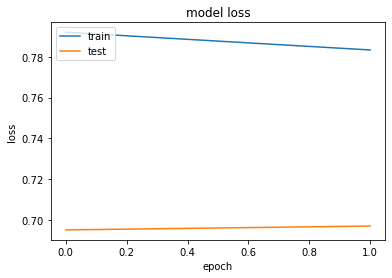

In [ ]:
#Training results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [ ]:
from tqdm.keras import TqdmCallback


history = model1.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=30,
    validation_data=(X_test_array, y_test),
    verbose = 0, 
    callbacks=[TqdmCallback(verbose=0)])

model1.load_weights(checkpoint_filepath)



0epoch [00:00, ?epoch/s]

KeyboardInterrupt: 

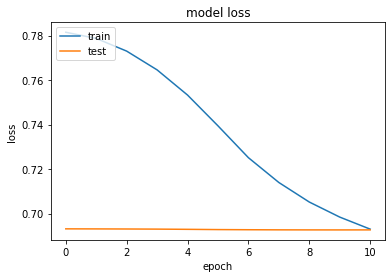

In [ ]:
#Training results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [ ]:
def extract_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

anime_weights = extract_weights('anime_embedding', model)
user_weights = extract_weights('user_embedding', model)

In [ ]:
data.columns

Index(['id', 'title', 'media_type', 'mean', 'num_scoring_users', 'status',
       'num_episodes', 'start_date', 'end_date', 'source', 'num_list_users',
       'popularity', 'num_favorites', 'rank', 'average_episode_duration',
       'rating', 'start_season_year', 'start_season_season', 'genres',
       'studios', 'synopsis', 'nsfw', 'created_at', 'updated_at'],
      dtype='object')

In [ ]:
name = data[data.id == 100].title.values[0]
print(name)

Shin Shirayuki-hime Densetsu Prétear


In [2]:
# Fixing Names
def get_animename(anime_id):
    try:
        name = data[data.id == anime_id].title.values[0]
        return name
    except:
        print('error')
        return 0

data["eng_version"] = data['title']


data.sort_values(by=['mean'], 
                inplace=True,
                ascending=False, 
                kind='quicksort',
                na_position='last')

df = data[["id","title", "mean", "genres", "num_episodes", 
        "media_type","synopsis"]]


def get_animeframe(anime):
    if isinstance(anime, int):
        return df[df.id == anime]
    if isinstance(anime, str):
        return df[df.title == anime]
def get_sypnopsis(anime):
    if isinstance(anime, int):
        return df[df.id == anime].synopsis.values[0]

NameError: name 'data' is not defined

In [ ]:
df.shape

(10233, 7)

In [ ]:
pd.set_option("max_colwidth", None)

def find_similar_animes(name, n=10, return_dist=False, neg=False):
        index = get_animeframe(name).id.values[0]
        print(index)
        encoded_index = anime2anime_encoded.get(index)
        weights = anime_weights
        print(encoded_index)
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1            
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]
        print('animes closest to {}'.format(name))
        if return_dist:
            return dists, closest
        rindex = df
        similarityarr = []

        for close in closest:
            decoded_id = anime_encoded2anime.get(close)
            sypnopsis = get_sypnopsis(decoded_id)
            anime_frame = get_animeframe(decoded_id)
            anime_name = anime_frame.title.values[0]
            genre = anime_frame.genres.values[0]
            similarity = dists[close]
            similarityarr.append({"id": decoded_id, "title": anime_name,
                            "similarity": similarity,"genres": genre,
                            'synopsis': sypnopsis})
        frame = pd.Dataframe(similarityarr).sort_values(by="similarity", ascending=False)
        return frame[frame.id != index].drop(['id'], axis=1)


In [ ]:
find_similar_animes('One Punch Man', n=10, neg=False)

30276
108
animes closest to One Punch Man


,title,similarity,genres,synopsis
9,Master Keaton,0.294809,"['Adult Cast', 'Adventure', 'Drama', 'Historical', 'Mystery', 'Seinen']",Taichi Keaton is a half-British half-Japanese archeologist and SAS veteran of the Falklands War. He solves mysteries and investigates insurance fraud for Lloyd's around the world.\n\n(Source: ANN)
8,Little Busters!,0.284318,"['Comedy', 'Drama', 'School', 'Slice of Life', 'Supernatural']","As a child, Riki Naoe shut himself from the world, thanks to a diagnosis of narcolepsy following the tragic deaths of his parents. However, Riki is saved when, one fateful day, a boy named Kyousuke recruits him into a team who call themselves the Little Busters. Accompanied by Masato, Kengo, and Rin, these misfits spend their childhood fighting evil and enjoying their youth.\n\nYears pass, and even in high school, the well-knit teammates remain together. Kyousuke decides to re-ignite the Little Busters by forming a baseball team as it will be his last school year with them. They have a problem though: there aren't enough members! The tables have turned, for it is now Riki's turn to reach out and recruit new friends into the Little Busters, just like Kyousuke had once done for him.\nThen, an omen surfaces—Rin finds a strange letter attached to her cat, assigning them the duty of uncovering the ""secret of this world"" by completing specific tasks. Just what is this secret, and why is it being hidden? It's up to the Little Busters to find out!\n\n[Written by MAL Rewrite]"
7,Radiant 2nd Season,0.275426,"['Action', 'Adventure', 'Fantasy']","After fleeing from Rumble Town, Seth, Doc and Melie are back at the Artemis Institute. Thanks to Alma, Seth learns more about Piodon, his mysterious brother. But the quest for the Nemeses mythical nest Radiant has already waited too long, so the Horned Boy and his friends head to the island-continent of the Wizard Knights.\n\nThis location may be a new city for audiences, but it's a decaying world that's falling apart! Not only must Seth deal with these hardships, but he must also face a personal phenomenon where visions are invading his mind a little more each day.\n\n(Source: monstersandcritics)"
6,Mitsudomoe,0.275222,"['Comedy', 'Gag Humor', 'School', 'Slice of Life']","The 11-year-old Marui triplets could not be any more different. The oldest one, Mitsuba, is sadistic and kind of mature for her age. The middle one, Futaba, is perverted and very athletic and has the strength of a full-grown man. The youngest one, Hitoha, is generally very quiet and gentle but when push comes to shove, she might just be the strongest, the most perverted and the most sadistic out of the three.\n\nThe three are all in the same class, led by the newly graduated teacher Yabe Satoshi. He usually gets pushed around by the girls and, on occasion, abused but the triplets also try to lead him and the new school nurse, the clumsy Kuriyama Aiko, together. However, Yabe had no intention of dating Aiko and the methods the triplets use to accomplish their goal are highly unorthodox..."
5,Fairy Tail x Rave,0.270376,"['Action', 'Adventure', 'Fantasy', 'Shounen']","While on a mission to find and defeat a troublesome mage, several members of the Fairy Tail guild are split up in an unfamiliar town. At the same time, Haru, Elie, and the rest of their group are also separated. In a fortunate turn of events, Elie runs into Lucy and Happy, who are looking for Natsu. Meanwhile, Haru stumbles upon Natsu, who is struggling with motion sickness. Although she seems friendly, Elie matches the description of the troublemaker that the Fairy Tail members were assigned to locate. To make matters worse, Natsu learns of Haru's relationship with her and suspects them to be accomplices.\n\nIn this crossover between two popular series, Fairy Tail x Rave follows the two groups as they discover their similarities with each other. As the miscommunications add up, they are pitted against one another in a heated clash of powers, but wil